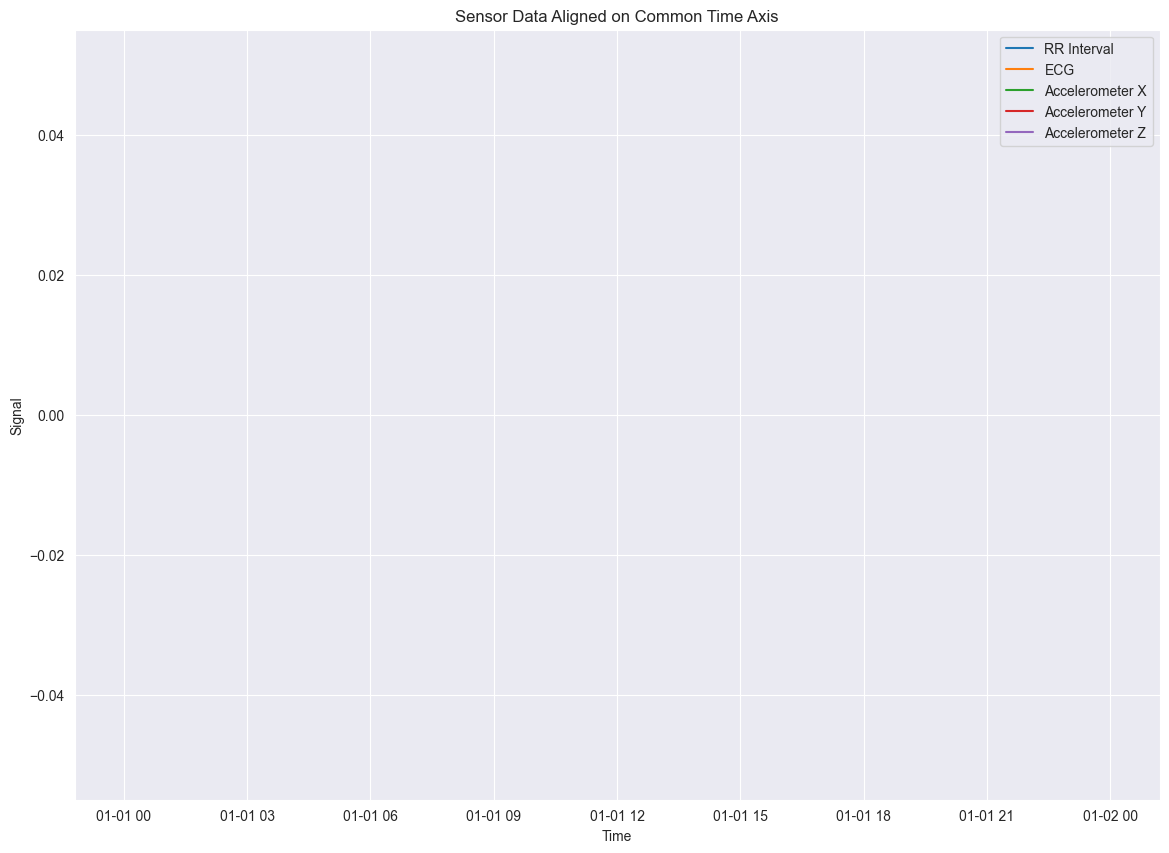

In [65]:
import pandas as pd
import numpy as np
import datetime

# Assume `df_rr`, `df_ecg`, `df_acc`, `df_gyro`, `df_mag` are your dataframes with `timestamp` columns in milliseconds
df_rr = pd.read_csv('Data/RR_2024_09_20_14_54.csv')
df_ecg = pd.read_csv('Data/ECG_2024_09_20_14_54.csv')
df_acc = pd.read_csv('Data/saved_data/ACC_2024_09_20_14_54.csv')
df_gyro = pd.read_csv('Data/saved_data/GYRO_2024_09_20_14_54.csv')
df_mag = pd.read_csv('Data/saved_data/MAGN_2024_09_20_14_54.csv')


# Step 1: Use RR's initial time as the reference start time
start_time_rr = df_rr['timestamp'].iloc[0] / 1000
start_time_datetime = datetime.datetime.fromtimestamp(start_time_rr)

# Step 2: Adjust timestamps of each dataframe relative to RR's start time
def adjust_timestamps(df, start_time_rr):
    df['adjusted_time'] = (df['timestamp'] / 1000) - start_time_rr
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'], unit='s', origin=start_time_datetime)
    return df

df_rr = adjust_timestamps(df_rr, start_time_rr)
df_ecg = adjust_timestamps(df_ecg, start_time_rr)
df_acc = adjust_timestamps(df_acc, start_time_rr)
df_gyro = adjust_timestamps(df_gyro, start_time_rr)
df_mag = adjust_timestamps(df_mag, start_time_rr)

# Step 3: Create a common time index based on the RR measurement duration and desired frequency (e.g., 100 ms)
time_index = pd.date_range(start=start_time_datetime, end=df_rr['adjusted_time'].iloc[-1], freq='100ms')

# Step 4: Resample or interpolate each signal to align with the common time index
def resample_to_common_time(df, time_index, columns):
    df_resampled = df.set_index('adjusted_time')[columns].reindex(time_index).interpolate(method='linear')
    return df_resampled

# Columns to resample for each signal
rr_resampled = resample_to_common_time(df_rr, time_index, ['sample'])
ecg_resampled = resample_to_common_time(df_ecg, time_index, ['sample'])
acc_resampled = resample_to_common_time(df_acc, time_index, ['x', 'y', 'z'])
gyro_resampled = resample_to_common_time(df_gyro, time_index, ['x', 'y', 'z'])
mag_resampled = resample_to_common_time(df_mag, time_index, ['x', 'y', 'z'])

# Step 5: Plot all signals on the same time axis
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Example for plotting RR, ECG, and accelerometer data
plt.plot(rr_resampled.index, rr_resampled['sample'], label='RR Interval')
plt.plot(ecg_resampled.index, ecg_resampled['sample'], label='ECG')
plt.plot(acc_resampled.index, acc_resampled['x'], label='Accelerometer X')
plt.plot(acc_resampled.index, acc_resampled['y'], label='Accelerometer Y')
plt.plot(acc_resampled.index, acc_resampled['z'], label='Accelerometer Z')

plt.xlabel("Time")
plt.ylabel("Signal")
plt.title("Sensor Data Aligned on Common Time Axis")
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# Check adjusted_time in df_rr
print("RR DataFrame adjusted_time:")
print(df_rr[['timestamp', 'adjusted_time']].head())
print(df_rr[['timestamp', 'adjusted_time']].tail())

# Check adjusted_time in df_acc
print("Accelerometer DataFrame adjusted_time:")
print(df_acc[['timestamp', 'adjusted_time']].head())
print(df_acc[['timestamp', 'adjusted_time']].tail())


RR DataFrame adjusted_time:
       timestamp                 adjusted_time
0  1726836847323 2024-09-20 14:54:07.000000000
1  1726836848283 2024-09-20 14:54:07.960000000
2  1726836849251 2024-09-20 14:54:08.928000000
3  1726836850212 2024-09-20 14:54:09.888999936
4  1726836851148 2024-09-20 14:54:10.824999936
         timestamp                 adjusted_time
213  1726837022467 2024-09-20 14:57:02.144000000
214  1726837023195 2024-09-20 14:57:02.872000000
215  1726837023915 2024-09-20 14:57:03.592000000
216  1726837024644 2024-09-20 14:57:04.321000192
217  1726837025371 2024-09-20 14:57:05.048000000
Accelerometer DataFrame adjusted_time:
       timestamp                 adjusted_time
0  1726836847207 2024-09-20 14:54:06.884000000
1  1726836847282 2024-09-20 14:54:06.959000064
2  1726836847301 2024-09-20 14:54:06.978000128
3  1726836847320 2024-09-20 14:54:06.996999936
4  1726836847338 2024-09-20 14:54:07.015000064
          timestamp                 adjusted_time
9508  1726837025860 2024-

In [67]:
print("Time Index Range:")
print("Start:", time_index[0])
print("End:", time_index[-1])


Time Index Range:
Start: 2024-09-20 14:54:07.323000
End: 2024-09-20 14:57:05.023000


In [68]:
print("RR adjusted_time range:", df_rr['adjusted_time'].min(), "-", df_rr['adjusted_time'].max())
print("ACC adjusted_time range:", df_acc['adjusted_time'].min(), "-", df_acc['adjusted_time'].max())


RR adjusted_time range: 2024-09-20 14:54:07 - 2024-09-20 14:57:05.048000
ACC adjusted_time range: 2024-09-20 14:54:06.884000 - 2024-09-20 14:57:05.612000


In [69]:
print("RR Resampled DataFrame:")
print(rr_resampled.head())
print(rr_resampled.tail())

print("Accelerometer Resampled DataFrame:")
print(acc_resampled.head())
print(acc_resampled.tail())


RR Resampled DataFrame:
                         sample
2024-09-20 14:54:07.323     NaN
2024-09-20 14:54:07.423     NaN
2024-09-20 14:54:07.523     NaN
2024-09-20 14:54:07.623     NaN
2024-09-20 14:54:07.723     NaN
                         sample
2024-09-20 14:57:04.623     NaN
2024-09-20 14:57:04.723     NaN
2024-09-20 14:57:04.823     NaN
2024-09-20 14:57:04.923     NaN
2024-09-20 14:57:05.023     NaN
Accelerometer Resampled DataFrame:
                          x   y   z
2024-09-20 14:54:07.323 NaN NaN NaN
2024-09-20 14:54:07.423 NaN NaN NaN
2024-09-20 14:54:07.523 NaN NaN NaN
2024-09-20 14:54:07.623 NaN NaN NaN
2024-09-20 14:54:07.723 NaN NaN NaN
                          x   y   z
2024-09-20 14:57:04.623 NaN NaN NaN
2024-09-20 14:57:04.723 NaN NaN NaN
2024-09-20 14:57:04.823 NaN NaN NaN
2024-09-20 14:57:04.923 NaN NaN NaN
2024-09-20 14:57:05.023 NaN NaN NaN


In [9]:
import matplotlib.pyplot as plt

df_rr = pd.read_csv('Data/Cleaned_data/RR_2024_09_20_14_54_cleaned.csv')
df_gsr = pd.read_csv('Data/Cleaned_data/GSR_2024_09_20_14_54_cleaned.csv')
df_acc = pd.read_csv('Data/Cleaned_data/ACC_2024_09_20_14_54_cleaned.csv')
df_gyro = pd.read_csv('Data/Cleaned_data/GYRO_2024_09_20_14_54_cleaned.csv')
df_mag = pd.read_csv('Data/Cleaned_data/MAGN_2024_09_20_14_54_cleaned.csv')

# Adjust timestamps relative to RR start time as before
#start_time_rr = df_rr['adjusted_time'].iloc[0] / 1000
#start_time_datetime = datetime.datetime.fromtimestamp(start_time_rr)

start_time_rr = pd.to_datetime(df_rr['adjusted_time'])

def adjust_timestamps(df, start_time_rr):
    df['adjusted_time'] = (df['adjusted_time']) - start_time_rr
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'], unit='s', origin=start_time_datetime)
    return df

# Adjust timestamps for each dataframe
df_rr = adjust_timestamps(df_rr, start_time_rr)
df_ecg = adjust_timestamps(df_ecg, start_time_rr)
df_acc = adjust_timestamps(df_acc, start_time_rr)
df_gyro = adjust_timestamps(df_gyro, start_time_rr)
df_mag = adjust_timestamps(df_mag, start_time_rr)

# Start plotting
fig, axs = plt.subplots(11, 1, figsize=(15, 18), sharex=True)

# Plot RR Interval
axs[0].plot(df_rr['adjusted_time'], df_rr['sample'], color='dodgerblue')
axs[0].set_ylabel("RRI")
axs[0].grid(True)

# Plot ECG
axs[1].plot(df_ecg['adjusted_time'], df_ecg['sample'], color='purple')
axs[1].set_ylabel("ECG")
axs[1].grid(True)

# Plot Accelerometer data - X, Y, Z directions
axs[2].plot(df_acc['adjusted_time'], df_acc['x'], color='red')
axs[2].set_ylabel("Acc X")
axs[2].grid(True)

axs[3].plot(df_acc['adjusted_time'], df_acc['y'], color='green')
axs[3].set_ylabel("Acc Y")
axs[3].grid(True)

axs[4].plot(df_acc['adjusted_time'], df_acc['z'], color='blue')
axs[4].set_ylabel("Acc Z")
axs[4].grid(True)

# Plot Gyroscope data - X, Y, Z directions
axs[5].plot(df_gyro['adjusted_time'], df_gyro['x'], color='orange')
axs[5].set_ylabel("Gyro X")
axs[5].grid(True)

axs[6].plot(df_gyro['adjusted_time'], df_gyro['y'], color='cyan')
axs[6].set_ylabel("Gyro Y")
axs[6].grid(True)

axs[7].plot(df_gyro['adjusted_time'], df_gyro['z'], color='magenta')
axs[7].set_ylabel("Gyro Z")
axs[7].grid(True)

# Plot Magnetometer data - X, Y, Z directions
axs[8].plot(df_mag['adjusted_time'], df_mag['x'], color='brown')
axs[8].set_ylabel("Mag X")
axs[8].grid(True)

axs[9].plot(df_mag['adjusted_time'], df_mag['y'], color='purple')
axs[9].set_ylabel("Mag Y")
axs[9].grid(True)

axs[10].plot(df_mag['adjusted_time'], df_mag['z'], color='pink')
axs[10].set_ylabel("Mag Z")
axs[10].grid(True)

# Formatting x-axis with time labels
axs[-1].set_xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: cannot subtract DatetimeArray from ndarray

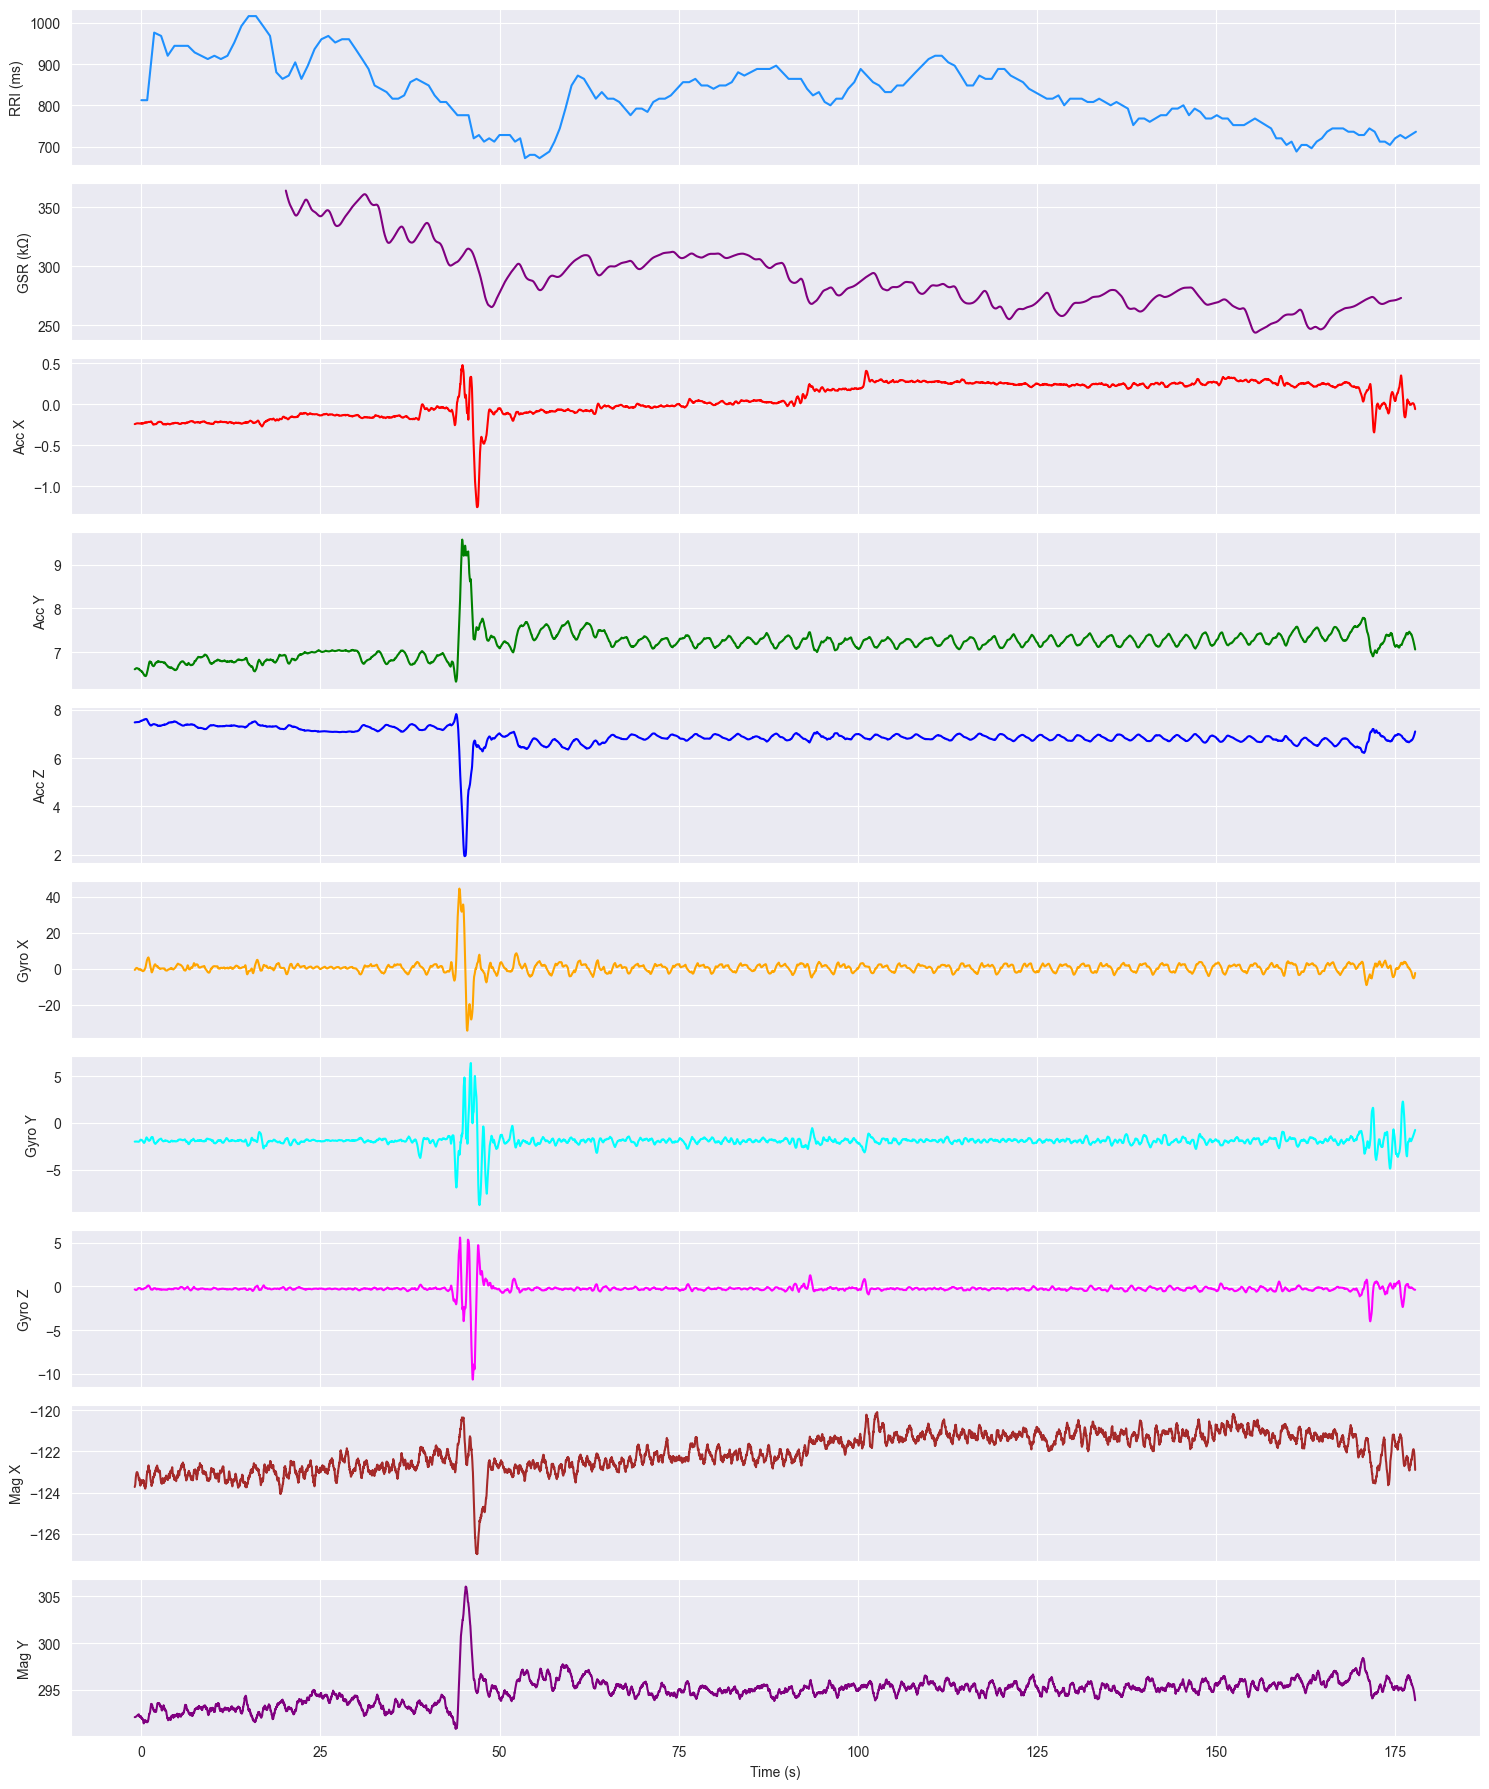

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_rr = pd.read_csv('Data/Cleaned_data/RR_2024_09_20_14_54_cleaned.csv')
df_gsr = pd.read_csv('Data/Cleaned_data/GSR_2024_09_20_14_54_cleaned.csv')
df_acc = pd.read_csv('Data/Cleaned_data/ACC_2024_09_20_14_54_cleaned.csv')
df_gyro = pd.read_csv('Data/Cleaned_data/GYRO_2024_09_20_14_54_cleaned.csv')
df_mag = pd.read_csv('Data/Cleaned_data/MAGN_2024_09_20_14_54_cleaned.csv')

# Convert adjusted_time columns to datetime objects and ensure they are timezone-naive
df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time']).dt.tz_localize(None)
df_gsr['adjusted_time'] = pd.to_datetime(df_gsr['adjusted_time']).dt.tz_localize(None)
df_acc['adjusted_time'] = pd.to_datetime(df_acc['adjusted_time']).dt.tz_localize(None)
df_gyro['adjusted_time'] = pd.to_datetime(df_gyro['adjusted_time']).dt.tz_localize(None)
df_mag['adjusted_time'] = pd.to_datetime(df_mag['adjusted_time']).dt.tz_localize(None)

# Use the start time of RR as the reference
start_time_rr = df_rr['adjusted_time'].iloc[0]

# Define a function to adjust timestamps relative to the start time
def adjust_timestamps(df, start_time):
    df['adjusted_time'] = (df['adjusted_time'] - start_time).dt.total_seconds()
    return df

# Adjust timestamps for all dataframes
df_rr = adjust_timestamps(df_rr, start_time_rr)
df_gsr = adjust_timestamps(df_gsr, start_time_rr)
df_acc = adjust_timestamps(df_acc, start_time_rr)
df_gyro = adjust_timestamps(df_gyro, start_time_rr)
df_mag = adjust_timestamps(df_mag, start_time_rr)

# Plotting
fig, axs = plt.subplots(10, 1, figsize=(15, 18), sharex=True)

# Plot RR Interval
axs[0].plot(df_rr['adjusted_time'], df_rr['Raw RRi'], color='dodgerblue')
axs[0].set_ylabel("RRI (ms)")
axs[0].grid(True)

# Plot GSR
axs[1].plot(df_gsr['adjusted_time'], df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'], color='purple')
axs[1].set_ylabel("GSR (kΩ)")
axs[1].grid(True)

# Plot Accelerometer data - X, Y, Z directions
axs[2].plot(df_acc['adjusted_time'], df_acc['x_smoothed'], color='red')
axs[2].set_ylabel("Acc X")
axs[2].grid(True)

axs[3].plot(df_acc['adjusted_time'], df_acc['y_smoothed'], color='green')
axs[3].set_ylabel("Acc Y")
axs[3].grid(True)

axs[4].plot(df_acc['adjusted_time'], df_acc['z_smoothed'], color='blue')
axs[4].set_ylabel("Acc Z")
axs[4].grid(True)

# Plot Gyroscope data - X, Y, Z directions
axs[5].plot(df_gyro['adjusted_time'], df_gyro['x_smoothed'], color='orange')
axs[5].set_ylabel("Gyro X")
axs[5].grid(True)

axs[6].plot(df_gyro['adjusted_time'], df_gyro['y_smoothed'], color='cyan')
axs[6].set_ylabel("Gyro Y")
axs[6].grid(True)

axs[7].plot(df_gyro['adjusted_time'], df_gyro['z_smoothed'], color='magenta')
axs[7].set_ylabel("Gyro Z")
axs[7].grid(True)

# Plot Magnetometer data - X, Y, Z directions
axs[8].plot(df_mag['adjusted_time'], df_mag['x_smoothed'], color='brown')
axs[8].set_ylabel("Mag X")
axs[8].grid(True)

axs[9].plot(df_mag['adjusted_time'], df_mag['y_smoothed'], color='purple')
axs[9].set_ylabel("Mag Y")
axs[9].grid(True)

axs[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()



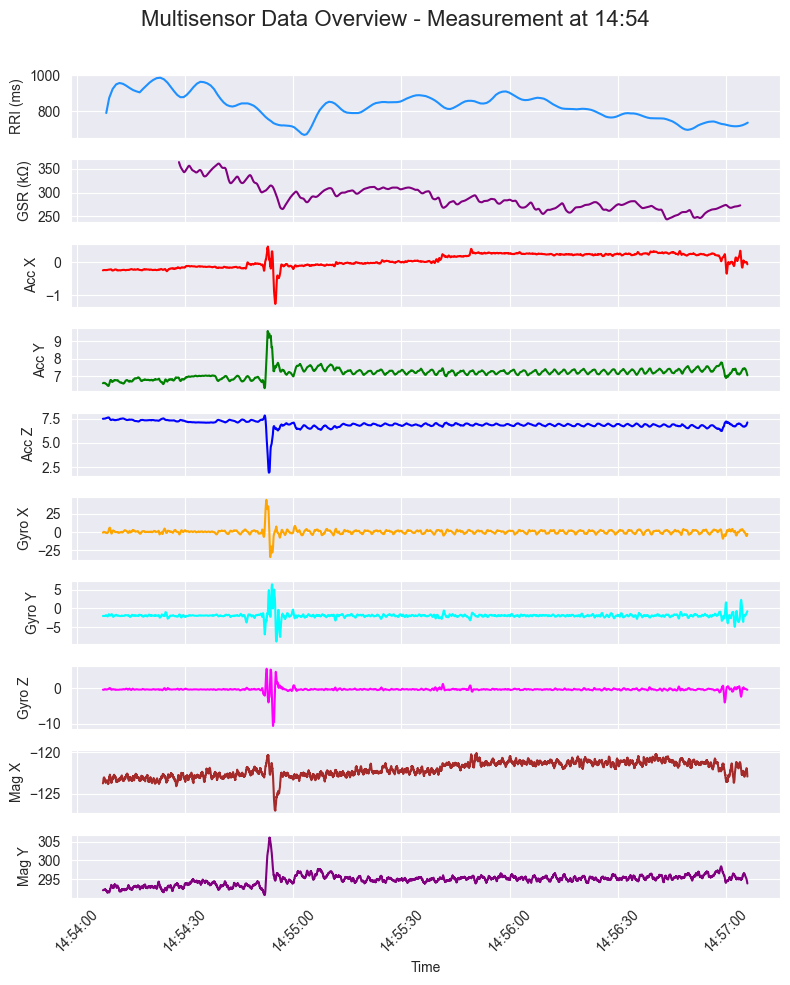

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
df_rr = pd.read_csv('Data/Cleaned_data/RR_2024_09_20_14_54_cleaned.csv')
df_gsr = pd.read_csv('Data/Cleaned_data/GSR_2024_09_20_14_54_cleaned.csv')
df_acc = pd.read_csv('Data/Cleaned_data/ACC_2024_09_20_14_54_cleaned.csv')
df_gyro = pd.read_csv('Data/Cleaned_data/GYRO_2024_09_20_14_54_cleaned.csv')
df_mag = pd.read_csv('Data/Cleaned_data/MAGN_2024_09_20_14_54_cleaned.csv')

# Convert adjusted_time columns to datetime objects
df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
df_gsr['adjusted_time'] = pd.to_datetime(df_gsr['adjusted_time']) + pd.Timedelta(hours=2)
df_acc['adjusted_time'] = pd.to_datetime(df_acc['adjusted_time'])
df_gyro['adjusted_time'] = pd.to_datetime(df_gyro['adjusted_time'])
df_mag['adjusted_time'] = pd.to_datetime(df_mag['adjusted_time'])

# Plotting
fig, axs = plt.subplots(10, 1, figsize=(8, 10), sharex=True)

# Plot RR Interval
axs[0].plot(df_rr['adjusted_time'], df_rr['Smoothed RRi'], color='dodgerblue')
axs[0].set_ylabel("RRI (ms)")
axs[0].grid(True)

# Plot GSR
axs[1].plot(df_gsr['adjusted_time'], df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'], color='purple')
axs[1].set_ylabel("GSR (kΩ)")
axs[1].grid(True)

# Plot Accelerometer data - X, Y, Z directions
axs[2].plot(df_acc['adjusted_time'], df_acc['x_smoothed'], color='red')
axs[2].set_ylabel("Acc X")
axs[2].grid(True)

axs[3].plot(df_acc['adjusted_time'], df_acc['y_smoothed'], color='green')
axs[3].set_ylabel("Acc Y")
axs[3].grid(True)

axs[4].plot(df_acc['adjusted_time'], df_acc['z_smoothed'], color='blue')
axs[4].set_ylabel("Acc Z")
axs[4].grid(True)

# Plot Gyroscope data - X, Y, Z directions
axs[5].plot(df_gyro['adjusted_time'], df_gyro['x_smoothed'], color='orange')
axs[5].set_ylabel("Gyro X")
axs[5].grid(True)

axs[6].plot(df_gyro['adjusted_time'], df_gyro['y_smoothed'], color='cyan')
axs[6].set_ylabel("Gyro Y")
axs[6].grid(True)

axs[7].plot(df_gyro['adjusted_time'], df_gyro['z_smoothed'], color='magenta')
axs[7].set_ylabel("Gyro Z")
axs[7].grid(True)

# Plot Magnetometer data - X, Y, Z directions
axs[8].plot(df_mag['adjusted_time'], df_mag['x_smoothed'], color='brown')
axs[8].set_ylabel("Mag X")
axs[8].grid(True)

axs[9].plot(df_mag['adjusted_time'], df_mag['y_smoothed'], color='purple')
axs[9].set_ylabel("Mag Y")
axs[9].grid(True)

# Formatting x-axis with timestamps
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.tick_params(axis='x', rotation=45)

# Add a title to the plot
plt.suptitle("Multisensor Data Overview - Measurement at 14:54", fontsize=16)
axs[-1].set_xlabel("Time")
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the title
plt.show()


In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Measurements to iterate through
measurements = ['14_35', '14_40', '14_45', '14_49', '14_54']

# Create IMG folder if it doesn't exist
output_dir = 'IMG'
os.makedirs(output_dir, exist_ok=True)

# Iterate through each measurement
for measurement in measurements:
    # Load the data for the current measurement
    df_rr = pd.read_csv(f'Data/Cleaned_data/RR_2024_09_20_{measurement}_cleaned.csv')
    df_gsr = pd.read_csv(f'Data/Cleaned_data/GSR_2024_09_20_{measurement}_cleaned.csv')
    df_acc = pd.read_csv(f'Data/Cleaned_data/ACC_2024_09_20_{measurement}_cleaned.csv')
    df_gyro = pd.read_csv(f'Data/Cleaned_data/GYRO_2024_09_20_{measurement}_cleaned.csv')
    df_mag = pd.read_csv(f'Data/Cleaned_data/MAGN_2024_09_20_{measurement}_cleaned.csv')

    # Convert adjusted_time columns to datetime objects
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
    df_gsr['adjusted_time'] = pd.to_datetime(df_gsr['adjusted_time']) + pd.Timedelta(hours=2)
    df_acc['adjusted_time'] = pd.to_datetime(df_acc['adjusted_time'])
    df_gyro['adjusted_time'] = pd.to_datetime(df_gyro['adjusted_time'])
    df_mag['adjusted_time'] = pd.to_datetime(df_mag['adjusted_time'])

    # Start plotting
    fig, axs = plt.subplots(11, 1, figsize=(10, 14), sharex=True)

    # Plot RR Interval
    axs[0].plot(df_rr['adjusted_time'], df_rr['Smoothed RRi'], color='dodgerblue')
    axs[0].set_ylabel("RRI (ms)")
    axs[0].grid(True)

    # Plot GSR Skin Conductance
    axs[1].plot(df_gsr['adjusted_time'], df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'], color='darkorange')
    axs[1].set_ylabel("Conductance (µS)")
    axs[1].grid(True)

    # Plot GSR Skin Resistance
    axs[2].plot(df_gsr['adjusted_time'], df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'], color='purple')
    axs[2].set_ylabel("Resistance (kΩ)")
    axs[2].grid(True)

    # Plot Accelerometer data - X, Y, Z directions
    axs[3].plot(df_acc['adjusted_time'], df_acc['x_smoothed'], color='red')
    axs[3].set_ylabel("Acc X")
    axs[3].grid(True)

    axs[4].plot(df_acc['adjusted_time'], df_acc['y_smoothed'], color='green')
    axs[4].set_ylabel("Acc Y")
    axs[4].grid(True)

    axs[5].plot(df_acc['adjusted_time'], df_acc['z_smoothed'], color='blue')
    axs[5].set_ylabel("Acc Z")
    axs[5].grid(True)

    # Plot Gyroscope data - X, Y, Z directions
    axs[6].plot(df_gyro['adjusted_time'], df_gyro['x_smoothed'], color='orange')
    axs[6].set_ylabel("Gyro X")
    axs[6].grid(True)

    axs[7].plot(df_gyro['adjusted_time'], df_gyro['y_smoothed'], color='cyan')
    axs[7].set_ylabel("Gyro Y")
    axs[7].grid(True)

    axs[8].plot(df_gyro['adjusted_time'], df_gyro['z_smoothed'], color='magenta')
    axs[8].set_ylabel("Gyro Z")
    axs[8].grid(True)

    # Plot Magnetometer data - X, Y, Z directions
    axs[9].plot(df_mag['adjusted_time'], df_mag['x_smoothed'], color='brown')
    axs[9].set_ylabel("Mag X")
    axs[9].grid(True)

    axs[10].plot(df_mag['adjusted_time'], df_mag['y_smoothed'], color='purple')
    axs[10].set_ylabel("Mag Y")
    axs[10].grid(True)

    # Formatting x-axis with timestamps
    for ax in axs:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        ax.tick_params(axis='x', rotation=45)

    # Add a title to the plot
    plt.suptitle(f"Multisensor Data Overview - Measurement at {measurement}", fontsize=16)
    axs[-1].set_xlabel("Time")
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the title

    # Save the plot
    output_file = os.path.join(output_dir, f'Multisensor_Data_{measurement}.png')
    plt.savefig(output_file, dpi=300)
    plt.close()

    print(f"Saved plot for measurement {measurement} to {output_file}")


Saved plot for measurement 14_35 to IMG\Multisensor_Data_14_35.png
Saved plot for measurement 14_40 to IMG\Multisensor_Data_14_40.png
Saved plot for measurement 14_45 to IMG\Multisensor_Data_14_45.png
Saved plot for measurement 14_49 to IMG\Multisensor_Data_14_49.png
Saved plot for measurement 14_54 to IMG\Multisensor_Data_14_54.png


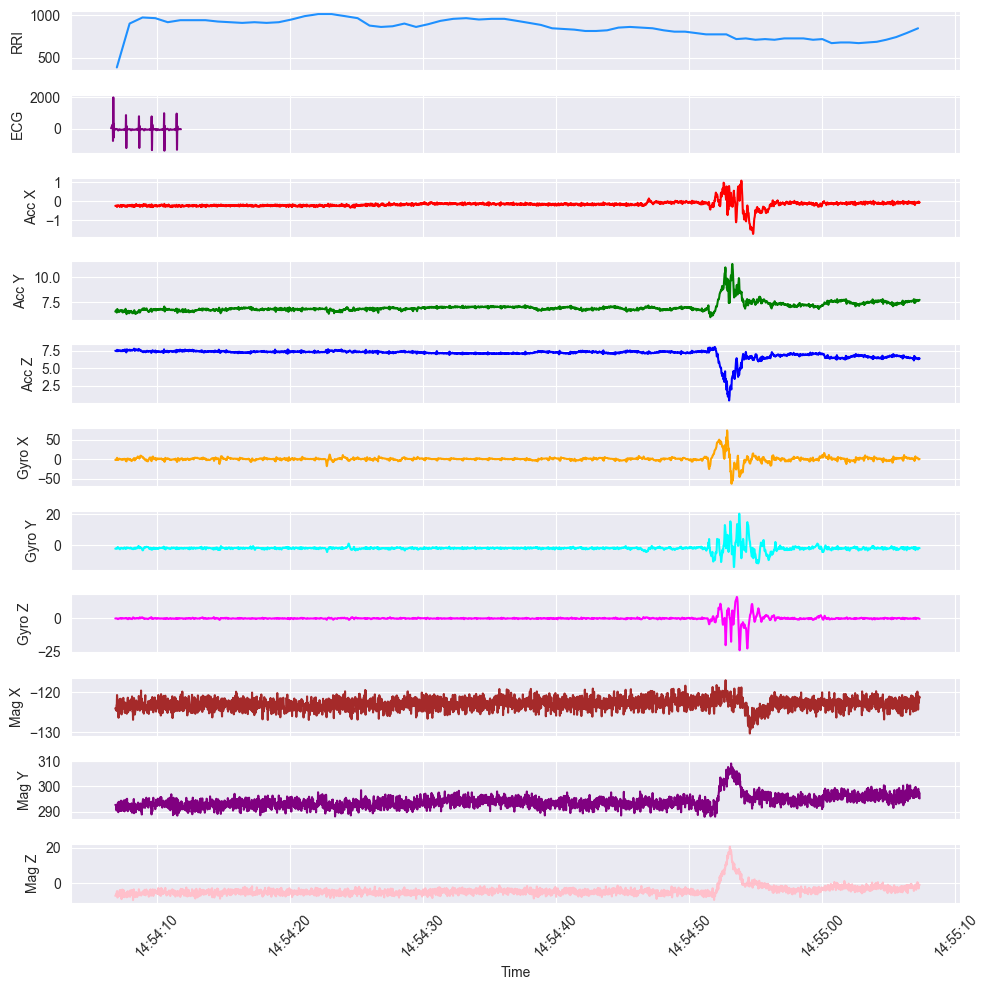

In [71]:
import matplotlib.pyplot as plt

# Adjust timestamps relative to RR start time as before
start_time_rr = df_rr['timestamp'].iloc[0] / 1000
start_time_datetime = datetime.datetime.fromtimestamp(start_time_rr)

def adjust_timestamps(df, start_time_rr):
    df['adjusted_time'] = (df['timestamp'] / 1000) - start_time_rr
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'], unit='s', origin=start_time_datetime)
    return df

# Adjust timestamps for each dataframe
df_rr = adjust_timestamps(df_rr, start_time_rr)
df_ecg = adjust_timestamps(df_ecg, start_time_rr)
df_acc = adjust_timestamps(df_acc, start_time_rr)
df_gyro = adjust_timestamps(df_gyro, start_time_rr)
df_mag = adjust_timestamps(df_mag, start_time_rr)

# Filter each DataFrame to only include the first minute of data
end_time = start_time_datetime + pd.Timedelta(minutes=1)
df_rr_first_min = df_rr[df_rr['adjusted_time'] <= end_time]
df_ecg_first_min = df_ecg[df_ecg['adjusted_time'] <= end_time]
df_acc_first_min = df_acc[df_acc['adjusted_time'] <= end_time]
df_gyro_first_min = df_gyro[df_gyro['adjusted_time'] <= end_time]
df_mag_first_min = df_mag[df_mag['adjusted_time'] <= end_time]

# Start plotting
fig, axs = plt.subplots(11, 1, figsize=(10, 10), sharex=True)

# Plot RR Interval
axs[0].plot(df_rr_first_min['adjusted_time'], df_rr_first_min['sample'], color='dodgerblue')
axs[0].set_ylabel("RRI")
axs[0].grid(True)

# Plot ECG
axs[1].plot(df_ecg_first_min['adjusted_time'], df_ecg_first_min['sample'], color='purple')
axs[1].set_ylabel("ECG")
axs[1].grid(True)

# Plot Accelerometer data - X, Y, Z directions
axs[2].plot(df_acc_first_min['adjusted_time'], df_acc_first_min['x'], color='red')
axs[2].set_ylabel("Acc X")
axs[2].grid(True)

axs[3].plot(df_acc_first_min['adjusted_time'], df_acc_first_min['y'], color='green')
axs[3].set_ylabel("Acc Y")
axs[3].grid(True)

axs[4].plot(df_acc_first_min['adjusted_time'], df_acc_first_min['z'], color='blue')
axs[4].set_ylabel("Acc Z")
axs[4].grid(True)

# Plot Gyroscope data - X, Y, Z directions
axs[5].plot(df_gyro_first_min['adjusted_time'], df_gyro_first_min['x'], color='orange')
axs[5].set_ylabel("Gyro X")
axs[5].grid(True)

axs[6].plot(df_gyro_first_min['adjusted_time'], df_gyro_first_min['y'], color='cyan')
axs[6].set_ylabel("Gyro Y")
axs[6].grid(True)

axs[7].plot(df_gyro_first_min['adjusted_time'], df_gyro_first_min['z'], color='magenta')
axs[7].set_ylabel("Gyro Z")
axs[7].grid(True)

# Plot Magnetometer data - X, Y, Z directions
axs[8].plot(df_mag_first_min['adjusted_time'], df_mag_first_min['x'], color='brown')
axs[8].set_ylabel("Mag X")
axs[8].grid(True)

axs[9].plot(df_mag_first_min['adjusted_time'], df_mag_first_min['y'], color='purple')
axs[9].set_ylabel("Mag Y")
axs[9].grid(True)

axs[10].plot(df_mag_first_min['adjusted_time'], df_mag_first_min['z'], color='pink')
axs[10].set_ylabel("Mag Z")
axs[10].grid(True)

# Formatting x-axis with time labels
axs[-1].set_xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


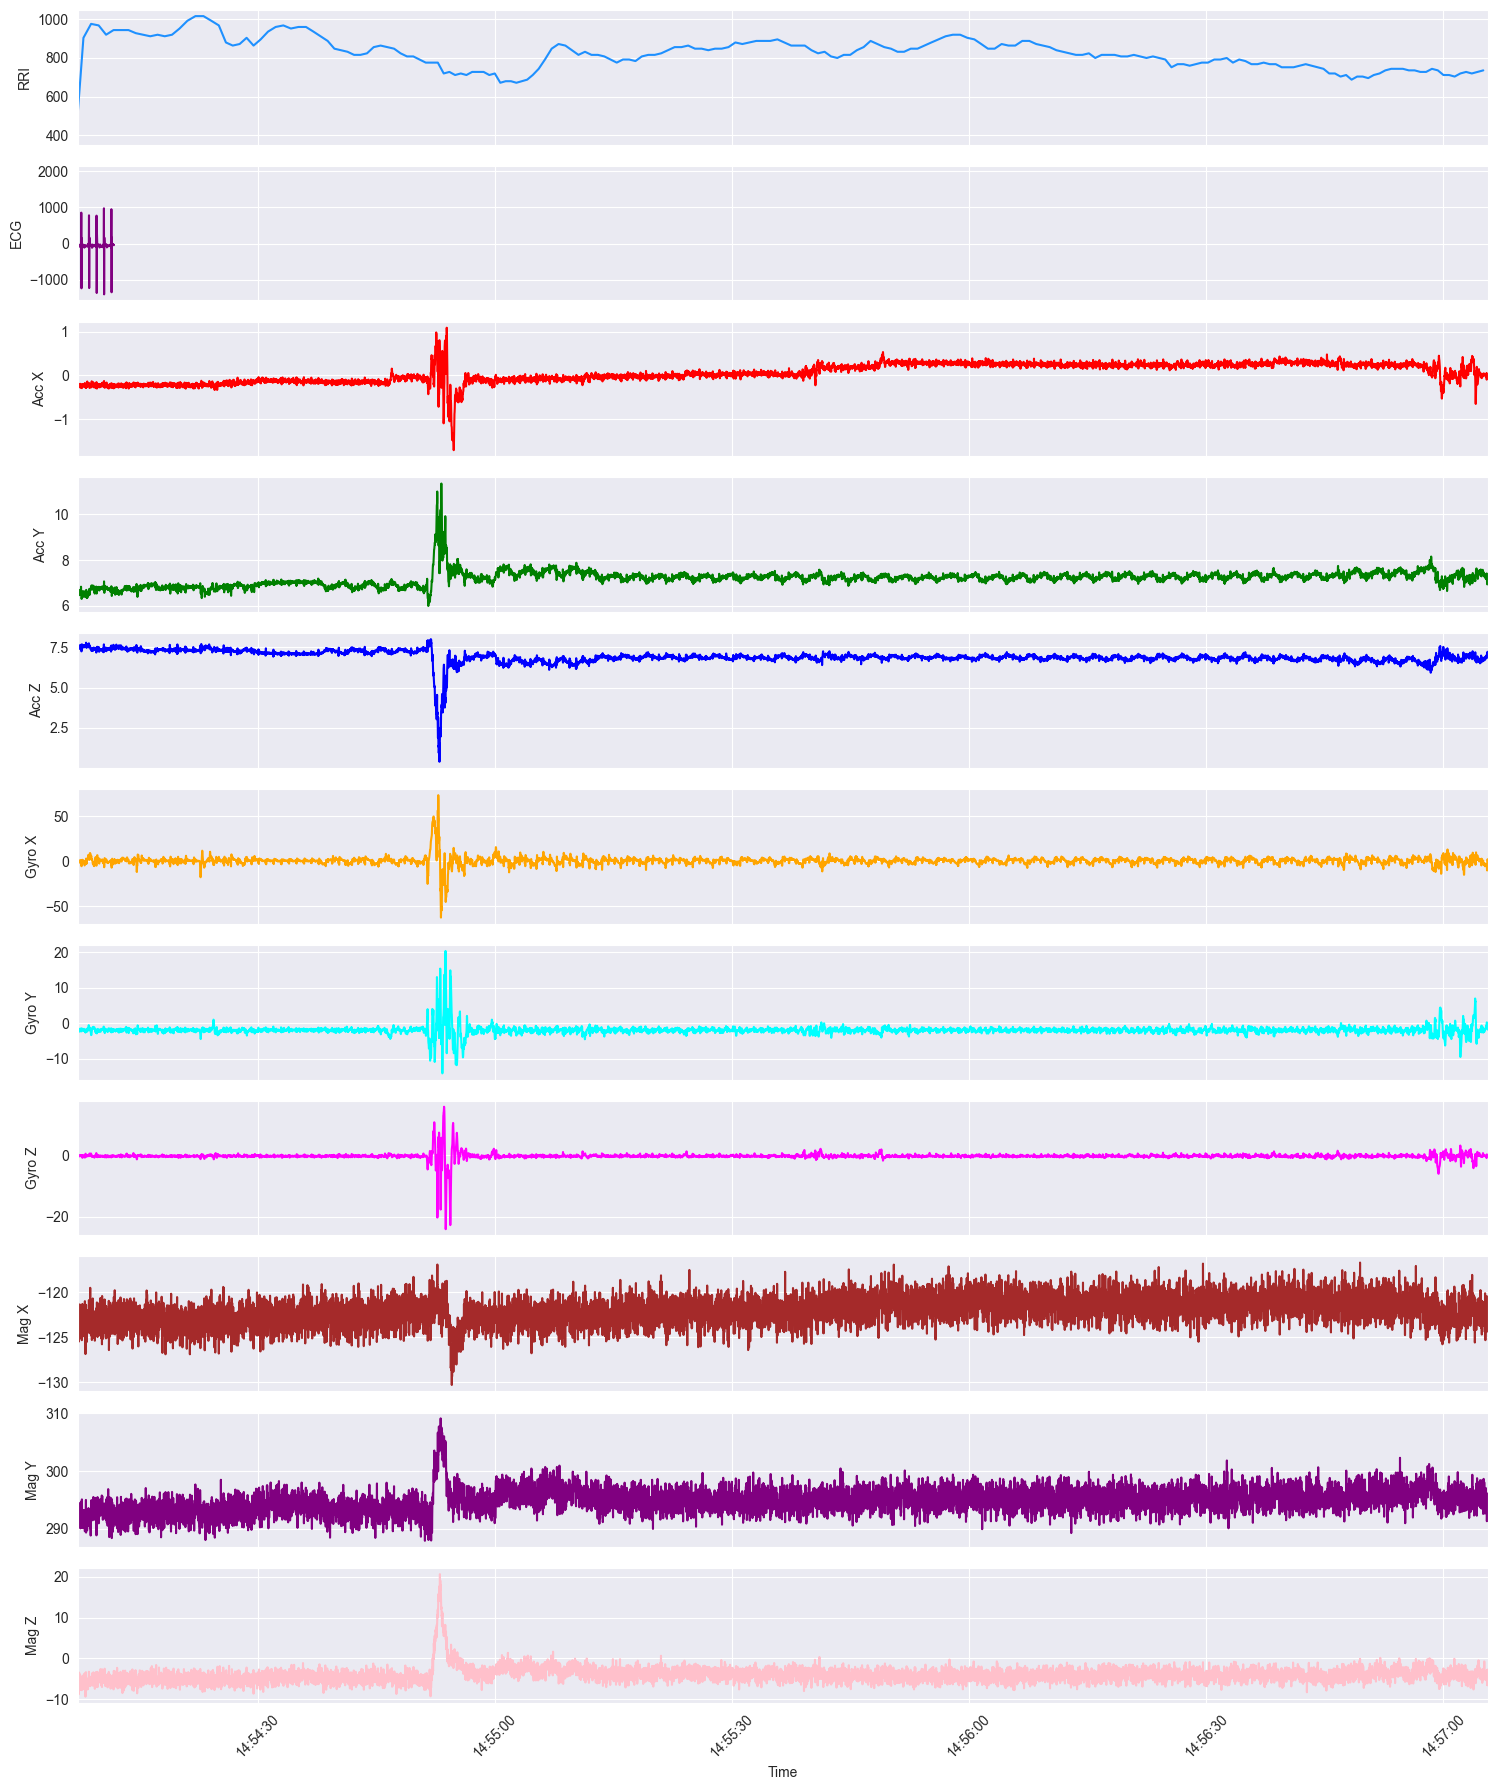

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# This code plots synchronized sensor data (RR interval, ECG, Accelerometer, Gyroscope, and Magnetometer) over a common time axis.
# The x-axis time limit is set based on the latest timestamp across all measurement data (excluding the RR interval).
# Each sensor axis direction (x, y, z) is displayed in separate subplots to allow detailed visualization of movement data.

# Adjust timestamps relative to RR start time as before
start_time_rr = df_rr['timestamp'].iloc[0] / 1000
start_time_datetime = datetime.datetime.fromtimestamp(start_time_rr)

def adjust_timestamps(df, start_time_rr):
    df['adjusted_time'] = (df['timestamp'] / 1000) - start_time_rr
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'], unit='s', origin=start_time_datetime)
    return df

# Adjust timestamps for each dataframe
df_rr = adjust_timestamps(df_rr, start_time_rr)
df_ecg = adjust_timestamps(df_ecg, start_time_rr)
df_acc = adjust_timestamps(df_acc, start_time_rr)
df_gyro = adjust_timestamps(df_gyro, start_time_rr)
df_mag = adjust_timestamps(df_mag, start_time_rr)

# Determine the latest timestamp among all measurements except RR
latest_ecg_time = df_ecg['adjusted_time'].max()
latest_acc_time = df_acc['adjusted_time'].max()
latest_gyro_time = df_gyro['adjusted_time'].max()
latest_mag_time = df_mag['adjusted_time'].max()

# Find the overall latest time to use as the x-axis limit
end_time = max(latest_ecg_time, latest_acc_time, latest_gyro_time, latest_mag_time)

# Start plotting
fig, axs = plt.subplots(11, 1, figsize=(15, 18), sharex=True)

# Plot RR Interval
axs[0].plot(df_rr['adjusted_time'], df_rr['sample'], color='dodgerblue')
axs[0].set_ylabel("RRI")
axs[0].grid(True)

# Plot ECG
axs[1].plot(df_ecg['adjusted_time'], df_ecg['sample'], color='purple')
axs[1].set_ylabel("ECG")
axs[1].grid(True)

# Plot Accelerometer data - X, Y, Z directions
axs[2].plot(df_acc['adjusted_time'], df_acc['x'], color='red')
axs[2].set_ylabel("Acc X")
axs[2].grid(True)

axs[3].plot(df_acc['adjusted_time'], df_acc['y'], color='green')
axs[3].set_ylabel("Acc Y")
axs[3].grid(True)

axs[4].plot(df_acc['adjusted_time'], df_acc['z'], color='blue')
axs[4].set_ylabel("Acc Z")
axs[4].grid(True)

# Plot Gyroscope data - X, Y, Z directions
axs[5].plot(df_gyro['adjusted_time'], df_gyro['x'], color='orange')
axs[5].set_ylabel("Gyro X")
axs[5].grid(True)

axs[6].plot(df_gyro['adjusted_time'], df_gyro['y'], color='cyan')
axs[6].set_ylabel("Gyro Y")
axs[6].grid(True)

axs[7].plot(df_gyro['adjusted_time'], df_gyro['z'], color='magenta')
axs[7].set_ylabel("Gyro Z")
axs[7].grid(True)

# Plot Magnetometer data - X, Y, Z directions
axs[8].plot(df_mag['adjusted_time'], df_mag['x'], color='brown')
axs[8].set_ylabel("Mag X")
axs[8].grid(True)

axs[9].plot(df_mag['adjusted_time'], df_mag['y'], color='purple')
axs[9].set_ylabel("Mag Y")
axs[9].grid(True)

axs[10].plot(df_mag['adjusted_time'], df_mag['z'], color='pink')
axs[10].set_ylabel("Mag Z")
axs[10].grid(True)

# Set x-axis limit to the determined end time
for ax in axs:
    ax.set_xlim([start_time_datetime, end_time])

# Formatting x-axis with time labels
axs[-1].set_xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values, get_time_domain_features
from hrvanalysis import get_frequency_domain_features, get_time_domain_features, get_geometrical_features, get_csi_cvi_features, get_poincare_plot_features
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# This code reads and cleans RR interval data by removing outliers, handling ectopic beats, and interpolating missing values.
# It then plots RR interval, ECG, Accelerometer, Gyroscope, and Magnetometer data on a common time axis.
# The x-axis time limit is set to the latest timestamp from all measurement data (excluding RR data).

# Step 1: Load and clean RR interval data
# Read the CSV file into a DataFrame
df_rr_raw = pd.read_csv('Data/RR_2024_09_20_14_35.csv')

# Convert 'sample' column to a list of floats
rr_raw = [float(i) for i in df_rr_raw['sample'].tolist()]
rr_data_chess = np.array(rr_raw)

# Clean the RR intervals
rr_intervals_without_outliers = remove_outliers(rr_intervals=rr_data_chess, low_rri=500, high_rri=1200)
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers, interpolation_method="linear")
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)

# Remove specific unwanted indices if any
indices_to_remove = [0, 1]  # Example indices to remove (adjust as needed)
full_signal_cleaned = np.nan_to_num(interpolated_nn_intervals, nan=0.0)
indices_to_keep = np.array([i for i in range(len(full_signal_cleaned)) if i not in indices_to_remove])
cleaned_rr_signal = full_signal_cleaned[indices_to_keep]

# Update the RR DataFrame with cleaned data
df_rr_raw['cleaned_sample'] = cleaned_rr_signal[:len(df_rr_raw)]  # Ensure the length matches

# Adjust timestamps relative to RR start time
start_time_rr = df_rr_raw['timestamp'].iloc[0] / 1000
start_time_datetime = datetime.datetime.fromtimestamp(start_time_rr)

def adjust_timestamps(df, start_time_rr):
    df['adjusted_time'] = (df['timestamp'] / 1000) - start_time_rr
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'], unit='s', origin=start_time_datetime)
    return df

# Adjust timestamps for each dataframe
df_rr = adjust_timestamps(df_rr_raw, start_time_rr)
df_ecg = adjust_timestamps(df_ecg, start_time_rr)
df_acc = adjust_timestamps(df_acc, start_time_rr)
df_gyro = adjust_timestamps(df_gyro, start_time_rr)
df_mag = adjust_timestamps(df_mag, start_time_rr)

# Determine the latest timestamp among all measurements except RR
latest_ecg_time = df_ecg['adjusted_time'].max()
latest_acc_time = df_acc['adjusted_time'].max()
latest_gyro_time = df_gyro['adjusted_time'].max()
latest_mag_time = df_mag['adjusted_time'].max()

# Find the overall latest time to use as the x-axis limit
end_time = max(latest_ecg_time, latest_acc_time, latest_gyro_time, latest_mag_time)

# Start plotting
fig, axs = plt.subplots(11, 1, figsize=(15, 18), sharex=True)

# Plot cleaned RR Interval
axs[0].plot(df_rr['adjusted_time'], df_rr['cleaned_sample'], color='dodgerblue')
axs[0].set_ylabel("RRI")
axs[0].grid(True)

# Plot ECG
axs[1].plot(df_ecg['adjusted_time'], df_ecg['sample'], color='purple')
axs[1].set_ylabel("ECG")
axs[1].grid(True)

# Plot Accelerometer data - X, Y, Z directions
axs[2].plot(df_acc['adjusted_time'], df_acc['x'], color='red')
axs[2].set_ylabel("Acc X")
axs[2].grid(True)

axs[3].plot(df_acc['adjusted_time'], df_acc['y'], color='green')
axs[3].set_ylabel("Acc Y")
axs[3].grid(True)

axs[4].plot(df_acc['adjusted_time'], df_acc['z'], color='blue')
axs[4].set_ylabel("Acc Z")
axs[4].grid(True)

# Plot Gyroscope data - X, Y, Z directions
axs[5].plot(df_gyro['adjusted_time'], df_gyro['x'], color='orange')
axs[5].set_ylabel("Gyro X")
axs[5].grid(True)

axs[6].plot(df_gyro['adjusted_time'], df_gyro['y'], color='cyan')
axs[6].set_ylabel("Gyro Y")
axs[6].grid(True)

axs[7].plot(df_gyro['adjusted_time'], df_gyro['z'], color='magenta')
axs[7].set_ylabel("Gyro Z")
axs[7].grid(True)

# Plot Magnetometer data - X, Y, Z directions
axs[8].plot(df_mag['adjusted_time'], df_mag['x'], color='brown')
axs[8].set_ylabel("Mag X")
axs[8].grid(True)

axs[9].plot(df_mag['adjusted_time'], df_mag['y'], color='purple')
axs[9].set_ylabel("Mag Y")
axs[9].grid(True)

axs[10].plot(df_mag['adjusted_time'], df_mag['z'], color='pink')
axs[10].set_ylabel("Mag Z")
axs[10].grid(True)

# Set x-axis limit to the determined end time
for ax in axs:
    ax.set_xlim([start_time_datetime, end_time])

# Formatting x-axis with time labels
axs[-1].set_xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1 outlier(s) have been deleted.
The outlier(s) value(s) are : [376.0]
1 ectopic beat(s) have been deleted with malik rule.


ValueError: Length of values (170) does not match length of index (172)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# This code reads and cleans RR interval data by removing outliers, handling ectopic beats, and interpolating missing values.
# It then plots RR interval, ECG, Accelerometer, Gyroscope, and Magnetometer data on a common time axis.
# The x-axis time limit is set to the latest timestamp from all measurement data (excluding RR data).

# Step 1: Load and clean RR interval data
# Read the CSV file into a DataFrame
df_rr_raw = pd.read_csv('Data/RR_2024_09_20_14_35.csv')

# Convert 'sample' column to a list of floats
rr_raw = [float(i) for i in df_rr_raw['sample'].tolist()]
rr_data_chess = np.array(rr_raw)

# Clean the RR intervals
rr_intervals_without_outliers = remove_outliers(rr_intervals=rr_data_chess, low_rri=500, high_rri=1200)
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers, interpolation_method="linear")
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)

# Remove specific unwanted indices if any
indices_to_remove = [0, 1]  # Example indices to remove (adjust as needed)
full_signal_cleaned = np.nan_to_num(interpolated_nn_intervals, nan=0.0)
indices_to_keep = np.array([i for i in range(len(full_signal_cleaned)) if i not in indices_to_remove])
cleaned_rr_signal = full_signal_cleaned[indices_to_keep]

# Calculate the sum of all values in the cleaned signal to use as a fill value
fill_value = np.sum(cleaned_rr_signal)

# Make sure the cleaned signal matches the length of df_rr_raw
# Fill with the sum of all values if cleaned signal is shorter
if len(cleaned_rr_signal) < len(df_rr_raw):
    cleaned_rr_signal = np.pad(cleaned_rr_signal, (0, len(df_rr_raw) - len(cleaned_rr_signal)), constant_values=fill_value)
elif len(cleaned_rr_signal) > len(df_rr_raw):
    # Trim if cleaned signal is longer
    cleaned_rr_signal = cleaned_rr_signal[:len(df_rr_raw)]

# Add the cleaned data as a new column in df_rr_raw
df_rr_raw['cleaned_sample'] = cleaned_rr_signal

# Adjust timestamps relative to RR start time
start_time_rr = df_rr_raw['timestamp'].iloc[0] / 1000
start_time_datetime = datetime.datetime.fromtimestamp(start_time_rr)

def adjust_timestamps(df, start_time_rr):
    df['adjusted_time'] = (df['timestamp'] / 1000) - start_time_rr
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'], unit='s', origin=start_time_datetime)
    return df

# Adjust timestamps for each dataframe
df_rr = adjust_timestamps(df_rr_raw, start_time_rr)
df_ecg = adjust_timestamps(df_ecg, start_time_rr)
df_acc = adjust_timestamps(df_acc, start_time_rr)
df_gyro = adjust_timestamps(df_gyro, start_time_rr)
df_mag = adjust_timestamps(df_mag, start_time_rr)

# Determine the latest timestamp among all measurements except RR
latest_ecg_time = df_ecg['adjusted_time'].max()
latest_acc_time = df_acc['adjusted_time'].max()
latest_gyro_time = df_gyro['adjusted_time'].max()
latest_mag_time = df_mag['adjusted_time'].max()

# Find the overall latest time to use as the x-axis limit
end_time = max(latest_ecg_time, latest_acc_time, latest_gyro_time, latest_mag_time)

# Start plotting
fig, axs = plt.subplots(11, 1, figsize=(15, 18), sharex=True)

# Plot cleaned RR Interval
axs[0].plot(df_rr['adjusted_time'], df_rr_raw['cleaned_sample'], color='dodgerblue')
axs[0].set_ylabel("RRI")
axs[0].grid(True)

# Plot ECG
axs[1].plot(df_ecg['adjusted_time'], df_ecg['sample'], color='purple')
axs[1].set_ylabel("ECG")
axs[1].grid(True)

# Plot Accelerometer data - X, Y, Z directions
axs[2].plot(df_acc['adjusted_time'], df_acc['x'], color='red')
axs[2].set_ylabel("Acc X")
axs[2].grid(True)

axs[3].plot(df_acc['adjusted_time'], df_acc['y'], color='green')
axs[3].set_ylabel("Acc Y")
axs[3].grid(True)

axs[4].plot(df_acc['adjusted_time'], df_acc['z'], color='blue')
axs[4].set_ylabel("Acc Z")
axs[4].grid(True)

# Plot Gyroscope data - X, Y, Z directions
axs[5].plot(df_gyro['adjusted_time'], df_gyro['x'], color='orange')
axs[5].set_ylabel("Gyro X")
axs[5].grid(True)

axs[6].plot(df_gyro['adjusted_time'], df_gyro['y'], color='cyan')
axs[6].set_ylabel("Gyro Y")
axs[6].grid(True)

axs[7].plot(df_gyro['adjusted_time'], df_gyro['z'], color='magenta')
axs[7].set_ylabel("Gyro Z")
axs[7].grid(True)

# Plot Magnetometer data - X, Y, Z directions
axs[8].plot(df_mag['adjusted_time'], df_mag['x'], color='brown')
axs[8].set_ylabel("Mag X")
axs[8].grid(True)

axs[9].plot(df_mag['adjusted_time'], df_mag['y'], color='purple')
axs[9].set_ylabel("Mag Y")
axs[9].grid(True)

axs[10].plot(df_mag['adjusted_time'], df_mag['z'], color='pink')
axs[10].set_ylabel("Mag Z")
axs[10].grid(True)

# Set x-axis limit to the determined end time
for ax in axs:
    ax.set_xlim([start_time_datetime, end_time])

# Formatting x-axis with time labels
axs[-1].set_xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import os

# Define time segments and data paths
time_segments = ['14_35', '14_40', '14_45', '14_49', '14_54']
data_dir = 'Data/Cleaned_data'
output_dir = 'Plots'
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Function to plot cleaned data for each segment
def plot_cleaned_data(segment):
    # Load RRi data
    rri_file = f'{data_dir}/RR_2024_09_20_{segment}_cleaned.csv'
    rri_df = pd.read_csv(rri_file)

    # Load motion sensor data
    acc_file = f'{data_dir}/ACC_2024_09_20_{segment}_cleaned.csv'
    gyro_file = f'{data_dir}/GYRO_2024_09_20_{segment}_cleaned.csv'
    magn_file = f'{data_dir}/MAGN_2024_09_20_{segment}_cleaned.csv'

    acc_df = pd.read_csv(acc_file)
    gyro_df = pd.read_csv(gyro_file)
    magn_df = pd.read_csv(magn_file)

    # Load GSR data
    gsr_file = f'{data_dir}/GSR_2024_09_20_{segment}_cleaned.csv'
    gsr_df = pd.read_csv(gsr_file)

    # Prepare the figure
    fig, axs = plt.subplots(10, 1, figsize=(12, 20), sharex=True)

    # Plot RRi data
    axs[0].plot(rri_df['adjusted_time'], rri_df['Raw RRi'], label='RRi', color='blue')
    axs[0].set_title('RRi')

    # Plot ECG data if available
    if 'ECG' in rri_df.columns:
        axs[1].plot(rri_df['adjusted_time'], rri_df['ECG'], label='ECG', color='purple')
        axs[1].set_title('ECG')

    # Plot Accelerometer data
    axs[2].plot(acc_df['adjusted_time'], acc_df['x_smoothed'], label='Acc X', color='red')
    axs[2].set_title('Acc X')

    axs[3].plot(acc_df['adjusted_time'], acc_df['y_smoothed'], label='Acc Y', color='green')
    axs[3].set_title('Acc Y')

    axs[4].plot(acc_df['adjusted_time'], acc_df['z_smoothed'], label='Acc Z', color='blue')
    axs[4].set_title('Acc Z')

    # Plot Gyroscope data
    axs[5].plot(gyro_df['adjusted_time'], gyro_df['x_smoothed'], label='Gyro X', color='orange')
    axs[5].set_title('Gyro X')

    axs[6].plot(gyro_df['adjusted_time'], gyro_df['y_smoothed'], label='Gyro Y', color='cyan')
    axs[6].set_title('Gyro Y')

    axs[7].plot(gyro_df['adjusted_time'], gyro_df['z_smoothed'], label='Gyro Z', color='magenta')
    axs[7].set_title('Gyro Z')

    # Plot Magnetometer data
    axs[8].plot(magn_df['adjusted_time'], magn_df['x_smoothed'], label='Mag X', color='brown')
    axs[8].set_title('Mag X')

    axs[9].plot(magn_df['adjusted_time'], magn_df['y_smoothed'], label='Mag Y', color='purple')
    axs[9].set_title('Mag Y')

    # Add legends and layout adjustments
    for ax in axs:
        ax.legend(loc='upper right')
        ax.grid(True)

    plt.tight_layout()
    # Save the plot
    #plt.savefig(f'{output_dir}/Cleaned_Data_{segment}.png')
    #plt.close()
    plt.show()

# Plot all segments iteratively
for segment in time_segments:
    plot_cleaned_data(segment)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x00000163C0AEB760> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000163E1CB41F0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

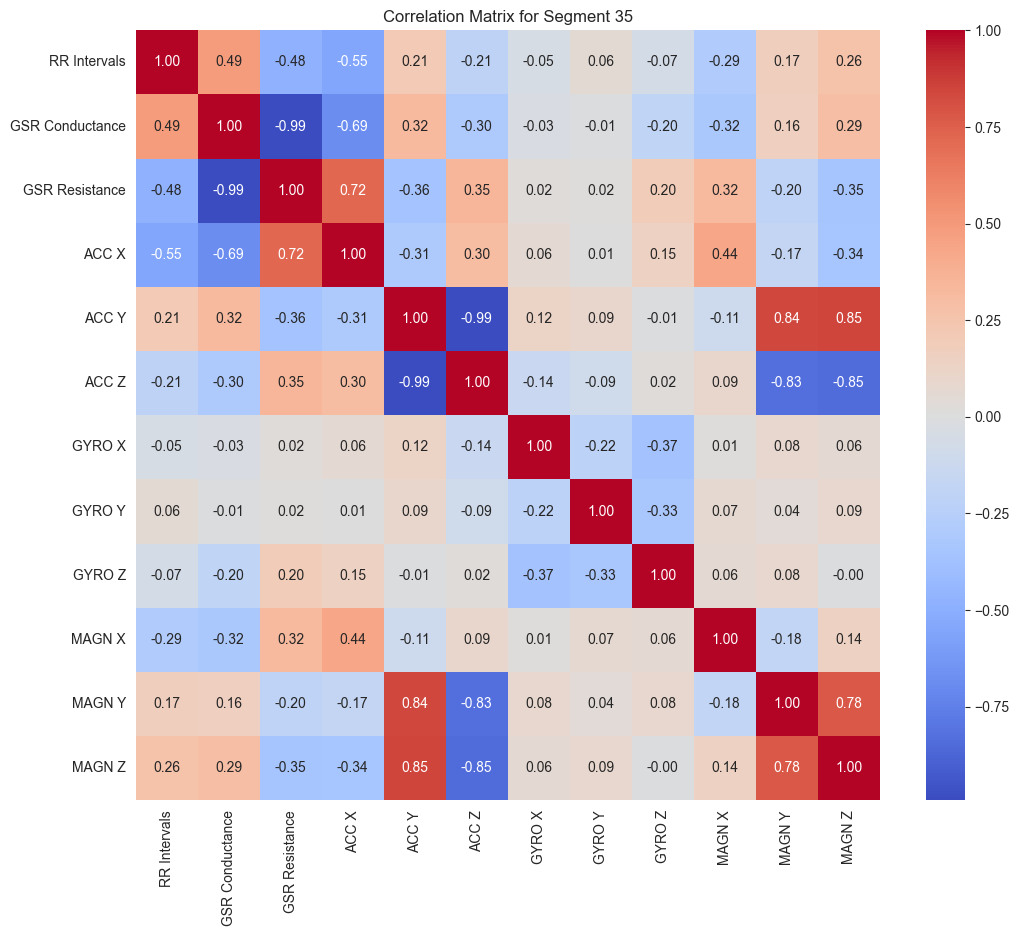

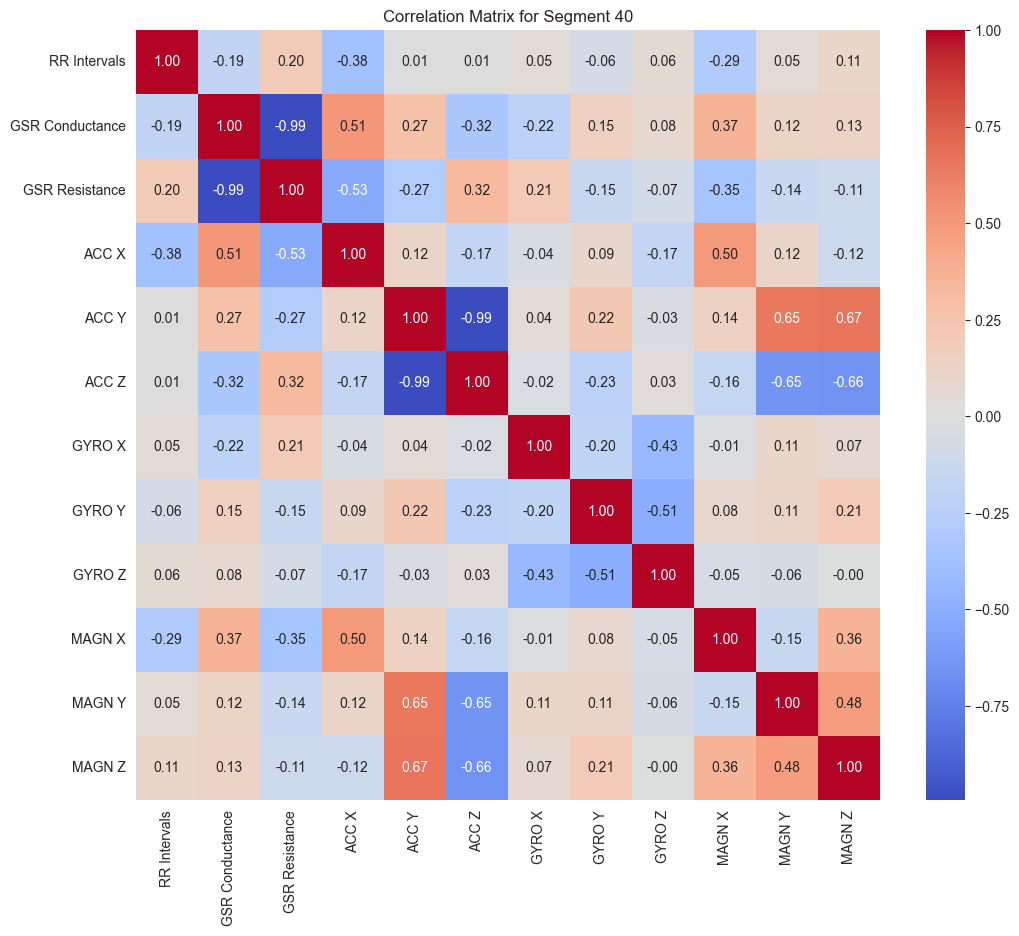

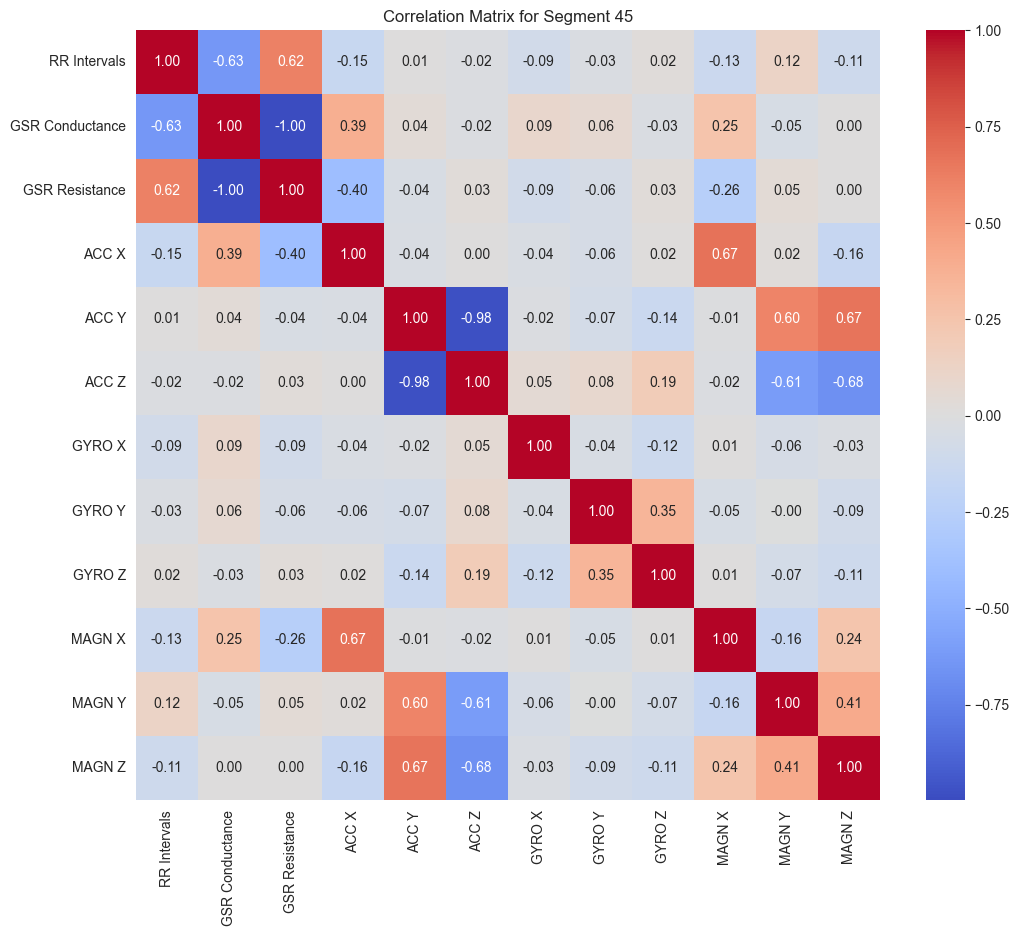

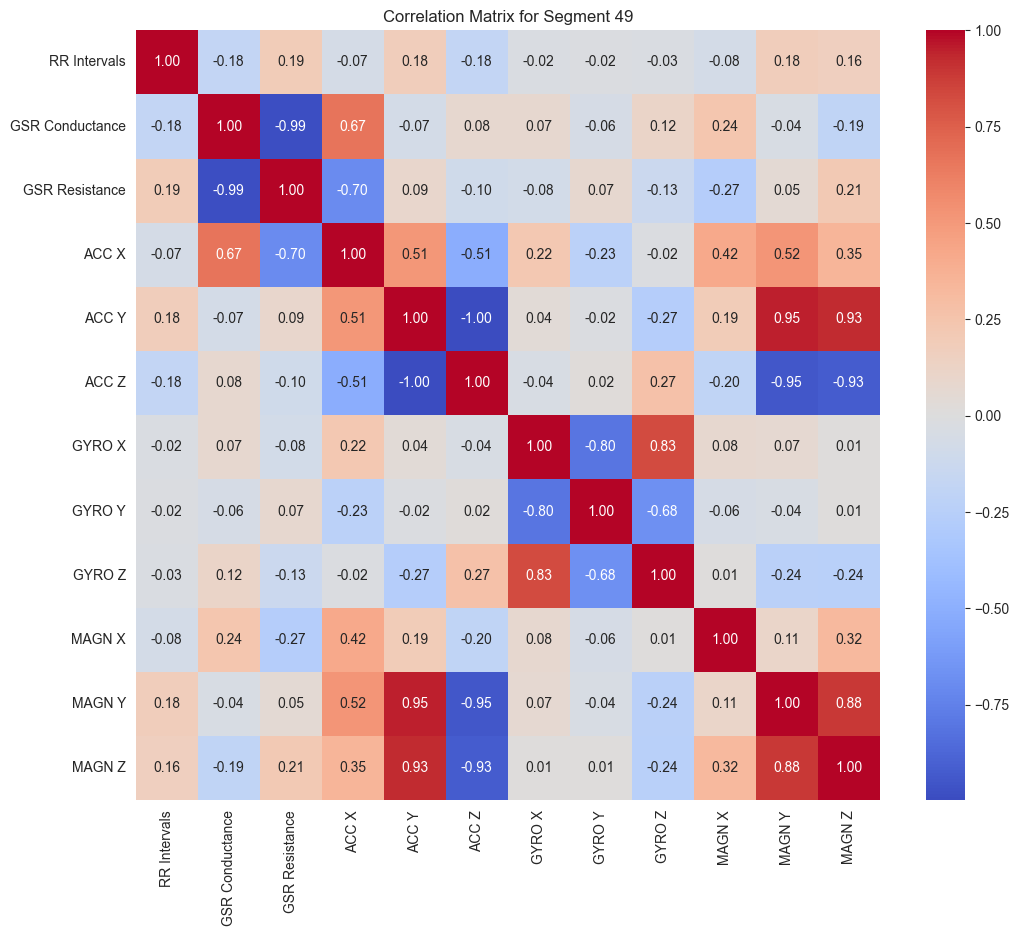

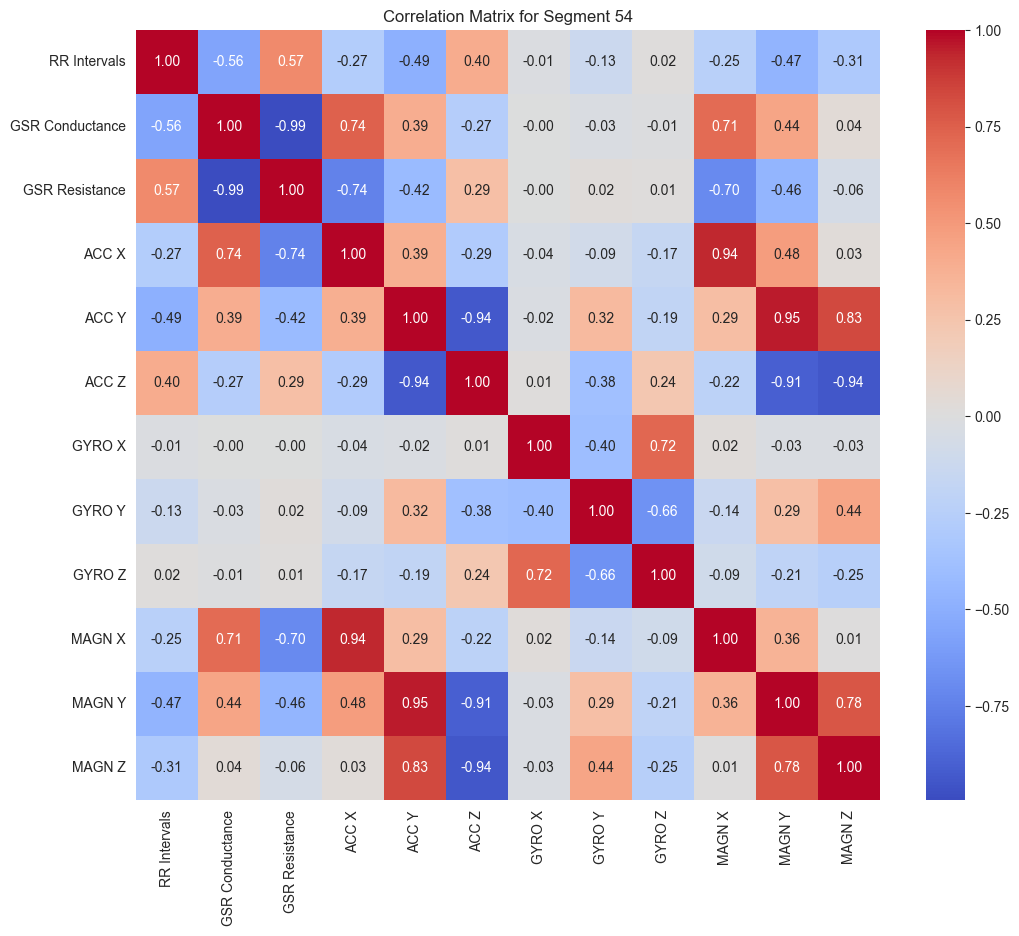

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the RR file suffixes
rr_suffixes = ['35', '40', '45', '49', '54']

# Initialize a dictionary to store correlation matrices
correlation_matrices = {}

# Iterate through each RR file
for suffix in rr_suffixes:
    # File paths
    rr_file = f'Data/Cleaned_data/RR_2024_09_20_14_{suffix}_cleaned.csv'
    gsr_file = f'Data/Cleaned_data/GSR_2024_09_20_14_{suffix}_cleaned.csv'
    acc_file = f'Data/Cleaned_data/ACC_2024_09_20_14_{suffix}_cleaned.csv'
    gyro_file = f'Data/Cleaned_data/GYRO_2024_09_20_14_{suffix}_cleaned.csv'
    magn_file = f'Data/Cleaned_data/MAGN_2024_09_20_14_{suffix}_cleaned.csv'

    # Load data
    df_rr = pd.read_csv(rr_file)
    df_gsr = pd.read_csv(gsr_file)
    df_acc = pd.read_csv(acc_file)
    df_gyro = pd.read_csv(gyro_file)
    df_magn = pd.read_csv(magn_file)

    # Convert timestamps to datetime
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
    df_gsr['adjusted_time'] = pd.to_datetime(df_gsr['adjusted_time'])
    df_acc['adjusted_time'] = pd.to_datetime(df_acc['adjusted_time'])
    df_gyro['adjusted_time'] = pd.to_datetime(df_gyro['adjusted_time'])
    df_magn['adjusted_time'] = pd.to_datetime(df_magn['adjusted_time'])

    # Extract relevant columns
    rr_intervals = df_rr['Smoothed RRi']
    gsr_conductance = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL']
    gsr_resistance = df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL']  # Avoid division by zero

    acc_x = df_acc['x_smoothed']
    acc_y = df_acc['y_smoothed']
    acc_z = df_acc['z_smoothed']

    gyro_x = df_gyro['x_smoothed']
    gyro_y = df_gyro['y_smoothed']
    gyro_z = df_gyro['z_smoothed']

    magn_x = df_magn['x_smoothed']
    magn_y = df_magn['y_smoothed']
    magn_z = df_magn['z_smoothed']

    # Resample GSR data to match RR intervals
    gsr_resampled_conductance = np.interp(
        np.linspace(0, len(gsr_conductance) - 1, num=len(rr_intervals)),
        np.arange(len(gsr_conductance)),
        gsr_conductance
    )
    gsr_resampled_resistance = np.interp(
        np.linspace(0, len(gsr_resistance) - 1, num=len(rr_intervals)),
        np.arange(len(gsr_resistance)),
        gsr_resistance
    )

    # Resample accelerometer, gyroscope, and magnetometer data
    acc_x_resampled = np.interp(
        np.linspace(0, len(acc_x) - 1, num=len(rr_intervals)),
        np.arange(len(acc_x)),
        acc_x
    )
    acc_y_resampled = np.interp(
        np.linspace(0, len(acc_y) - 1, num=len(rr_intervals)),
        np.arange(len(acc_y)),
        acc_y
    )
    acc_z_resampled = np.interp(
        np.linspace(0, len(acc_z) - 1, num=len(rr_intervals)),
        np.arange(len(acc_z)),
        acc_z
    )

    gyro_x_resampled = np.interp(
        np.linspace(0, len(gyro_x) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_x)),
        gyro_x
    )
    gyro_y_resampled = np.interp(
        np.linspace(0, len(gyro_y) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_y)),
        gyro_y
    )
    gyro_z_resampled = np.interp(
        np.linspace(0, len(gyro_z) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_z)),
        gyro_z
    )

    magn_x_resampled = np.interp(
        np.linspace(0, len(magn_x) - 1, num=len(rr_intervals)),
        np.arange(len(magn_x)),
        magn_x
    )
    magn_y_resampled = np.interp(
        np.linspace(0, len(magn_y) - 1, num=len(rr_intervals)),
        np.arange(len(magn_y)),
        magn_y
    )
    magn_z_resampled = np.interp(
        np.linspace(0, len(magn_z) - 1, num=len(rr_intervals)),
        np.arange(len(magn_z)),
        magn_z
    )

    # Create a DataFrame for correlation analysis
    df_combined = pd.DataFrame({
        'RR Intervals': rr_intervals,
        'GSR Conductance': gsr_resampled_conductance,
        'GSR Resistance': gsr_resampled_resistance,
        'ACC X': acc_x_resampled,
        'ACC Y': acc_y_resampled,
        'ACC Z': acc_z_resampled,
        'GYRO X': gyro_x_resampled,
        'GYRO Y': gyro_y_resampled,
        'GYRO Z': gyro_z_resampled,
        'MAGN X': magn_x_resampled,
        'MAGN Y': magn_y_resampled,
        'MAGN Z': magn_z_resampled
    })

    # Compute the correlation matrix
    correlation_matrix = df_combined.corr()
    correlation_matrices[suffix] = correlation_matrix

    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Matrix for Segment {suffix}")
    plt.show()



In [22]:
df_combined

,RR Intervals,GSR Conductance,GSR Resistance,ACC X,ACC Y,ACC Z,GYRO X,GYRO Y,GYRO Z,MAGN X,MAGN Y,MAGN Z
0,790.285745,2.747755,363.924101,-0.240738,6.604897,7.484771,-0.719966,-1.993159,-0.334264,-123.729622,292.074112,-6.200023
1,874.394555,2.855127,350.238389,-0.234332,6.569889,7.550358,-0.646325,-1.797289,-0.298341,-123.411338,292.055363,-6.051442
2,925.106950,2.916978,342.814896,-0.222143,6.513611,7.602357,4.568979,-1.588175,0.021816,-123.109931,291.540269,-6.007288
3,950.550670,2.859343,349.730595,-0.239727,6.685547,7.400646,-0.922633,-1.567726,-0.336669,-123.419734,293.042089,-5.329647
4,957.929522,2.807325,356.206039,-0.215395,6.778901,7.345713,0.450467,-1.832355,-0.295274,-122.979773,293.565586,-4.822027
...,...,...,...,...,...,...,...,...,...,...,...,...
213,716.569504,3.726938,268.316666,0.133362,7.422836,6.717284,-1.461905,-3.524560,0.015590,-121.906802,295.658653,-3.725377
214,718.529514,3.718124,268.953204,0.139378,7.136054,6.984748,-0.068338,-3.517483,0.346993,-121.847786,295.337106,-4.914782
215,722.385133,3.694266,270.689689,0.014213,7.266879,6.817177,2.803892,1.941874,-1.990595,-122.359896,295.011942,-4.486560
216,728.312045,3.684820,271.383707,0.021054,7.464751,6.669421,0.084601,-1.826394,-0.132815,-122.894279,296.404172,-3.774088


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the RR file suffixes
rr_suffixes = ['35', '40', '45', '49', '54']

# Create the directory for saving plots if it doesn't exist
output_dir = 'IMG/CM'
os.makedirs(output_dir, exist_ok=True)

# Iterate through each RR file
for suffix in rr_suffixes:
    # File paths
    rr_file = f'Data/Cleaned_data/RR_2024_09_20_14_{suffix}_cleaned.csv'
    gsr_file = f'Data/Cleaned_data/GSR_2024_09_20_14_{suffix}_cleaned.csv'
    acc_file = f'Data/Cleaned_data/ACC_2024_09_20_14_{suffix}_cleaned.csv'
    gyro_file = f'Data/Cleaned_data/GYRO_2024_09_20_14_{suffix}_cleaned.csv'
    magn_file = f'Data/Cleaned_data/MAGN_2024_09_20_14_{suffix}_cleaned.csv'

    # Load data
    df_rr = pd.read_csv(rr_file)
    df_gsr = pd.read_csv(gsr_file)
    df_acc = pd.read_csv(acc_file)
    df_gyro = pd.read_csv(gyro_file)
    df_magn = pd.read_csv(magn_file)

    # Convert timestamps to datetime
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
    df_gsr['adjusted_time'] = pd.to_datetime(df_gsr['adjusted_time'])
    df_acc['adjusted_time'] = pd.to_datetime(df_acc['adjusted_time'])
    df_gyro['adjusted_time'] = pd.to_datetime(df_gyro['adjusted_time'])
    df_magn['adjusted_time'] = pd.to_datetime(df_magn['adjusted_time'])

    # Extract relevant columns
    rr_intervals = df_rr['Smoothed RRi']
    gsr_conductance = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL']
    gsr_resistance = df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL']  # Avoid division by zero

    acc_x = df_acc['x_smoothed']
    acc_y = df_acc['y_smoothed']
    acc_z = df_acc['z_smoothed']

    gyro_x = df_gyro['x_smoothed']
    gyro_y = df_gyro['y_smoothed']
    gyro_z = df_gyro['z_smoothed']

    magn_x = df_magn['x_smoothed']
    magn_y = df_magn['y_smoothed']
    magn_z = df_magn['z_smoothed']

    # Resample GSR data to match RR intervals
    gsr_resampled_conductance = np.interp(
        np.linspace(0, len(gsr_conductance) - 1, num=len(rr_intervals)),
        np.arange(len(gsr_conductance)),
        gsr_conductance
    )
    gsr_resampled_resistance = np.interp(
        np.linspace(0, len(gsr_resistance) - 1, num=len(rr_intervals)),
        np.arange(len(gsr_resistance)),
        gsr_resistance
    )

    # Resample accelerometer, gyroscope, and magnetometer data
    acc_x_resampled = np.interp(
        np.linspace(0, len(acc_x) - 1, num=len(rr_intervals)),
        np.arange(len(acc_x)),
        acc_x
    )
    acc_y_resampled = np.interp(
        np.linspace(0, len(acc_y) - 1, num=len(rr_intervals)),
        np.arange(len(acc_y)),
        acc_y
    )
    acc_z_resampled = np.interp(
        np.linspace(0, len(acc_z) - 1, num=len(rr_intervals)),
        np.arange(len(acc_z)),
        acc_z
    )

    gyro_x_resampled = np.interp(
        np.linspace(0, len(gyro_x) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_x)),
        gyro_x
    )
    gyro_y_resampled = np.interp(
        np.linspace(0, len(gyro_y) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_y)),
        gyro_y
    )
    gyro_z_resampled = np.interp(
        np.linspace(0, len(gyro_z) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_z)),
        gyro_z
    )

    magn_x_resampled = np.interp(
        np.linspace(0, len(magn_x) - 1, num=len(rr_intervals)),
        np.arange(len(magn_x)),
        magn_x
    )
    magn_y_resampled = np.interp(
        np.linspace(0, len(magn_y) - 1, num=len(rr_intervals)),
        np.arange(len(magn_y)),
        magn_y
    )
    magn_z_resampled = np.interp(
        np.linspace(0, len(magn_z) - 1, num=len(rr_intervals)),
        np.arange(len(magn_z)),
        magn_z
    )

    # Create a DataFrame for correlation analysis
    df_combined = pd.DataFrame({
        'RR Intervals': rr_intervals,
        'GSR Conductance': gsr_resampled_conductance,
        'GSR Resistance': gsr_resampled_resistance,
        'ACC X': acc_x_resampled,
        'ACC Y': acc_y_resampled,
        'ACC Z': acc_z_resampled,
        'GYRO X': gyro_x_resampled,
        'GYRO Y': gyro_y_resampled,
        'GYRO Z': gyro_z_resampled,
        'MAGN X': magn_x_resampled,
        'MAGN Y': magn_y_resampled,
        'MAGN Z': magn_z_resampled
    })

    # Compute the correlation matrix
    correlation_matrix = df_combined.corr()

    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Matrix for Segment 14:{suffix}")

    # Save the plot
    output_path = os.path.join(output_dir, f'CM_RR_GSR_Motion_{suffix}.png')
    plt.savefig(output_path)
    plt.close()


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the RR file suffixes
rr_suffixes = ['35', '40', '45', '49', '54']

# Create the directory for saving plots if it doesn't exist
output_dir = 'IMG/CM'
os.makedirs(output_dir, exist_ok=True)

# Iterate through each RR file
for suffix in rr_suffixes:
    # File paths
    rr_file = f'Data/Cleaned_data/RR_2024_09_20_14_{suffix}_cleaned.csv'
    gsr_file = f'Data/Cleaned_data/GSR_2024_09_20_14_{suffix}_cleaned.csv'
    acc_file = f'Data/Cleaned_data/ACC_2024_09_20_14_{suffix}_cleaned.csv'
    gyro_file = f'Data/Cleaned_data/GYRO_2024_09_20_14_{suffix}_cleaned.csv'
    magn_file = f'Data/Cleaned_data/MAGN_2024_09_20_14_{suffix}_cleaned.csv'
    hrv_file = f'Data/HRV_data/HRV_2024_09_20_14_{suffix}.csv'

    # Load data
    df_rr = pd.read_csv(rr_file)
    df_gsr = pd.read_csv(gsr_file)
    df_acc = pd.read_csv(acc_file)
    df_gyro = pd.read_csv(gyro_file)
    df_magn = pd.read_csv(magn_file)
    df_hrv = pd.read_csv(hrv_file)

    # Convert timestamps to datetime
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
    df_gsr['adjusted_time'] = pd.to_datetime(df_gsr['adjusted_time'])
    df_acc['adjusted_time'] = pd.to_datetime(df_acc['adjusted_time'])
    df_gyro['adjusted_time'] = pd.to_datetime(df_gyro['adjusted_time'])
    df_magn['adjusted_time'] = pd.to_datetime(df_magn['adjusted_time'])

    # Extract relevant columns
    rr_intervals = df_rr['Smoothed RRi']
    gsr_conductance = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL']
    gsr_resistance = df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL']  # Avoid division by zero

    acc_x = df_acc['x_smoothed']
    acc_y = df_acc['y_smoothed']
    acc_z = df_acc['z_smoothed']

    gyro_x = df_gyro['x_smoothed']
    gyro_y = df_gyro['y_smoothed']
    gyro_z = df_gyro['z_smoothed']

    magn_x = df_magn['x_smoothed']
    magn_y = df_magn['y_smoothed']
    magn_z = df_magn['z_smoothed']

    hrv_features = df_hrv.drop(columns=['Timestamps', 'mean_rr', 'window_timestamps'])

    # Resample GSR data to match RR intervals
    gsr_resampled_conductance = np.interp(
        np.linspace(0, len(gsr_conductance) - 1, num=len(rr_intervals)),
        np.arange(len(gsr_conductance)),
        gsr_conductance
    )
    gsr_resampled_resistance = np.interp(
        np.linspace(0, len(gsr_resistance) - 1, num=len(rr_intervals)),
        np.arange(len(gsr_resistance)),
        gsr_resistance
    )

    # Resample accelerometer, gyroscope, and magnetometer data
    acc_x_resampled = np.interp(
        np.linspace(0, len(acc_x) - 1, num=len(rr_intervals)),
        np.arange(len(acc_x)),
        acc_x
    )
    acc_y_resampled = np.interp(
        np.linspace(0, len(acc_y) - 1, num=len(rr_intervals)),
        np.arange(len(acc_y)),
        acc_y
    )
    acc_z_resampled = np.interp(
        np.linspace(0, len(acc_z) - 1, num=len(rr_intervals)),
        np.arange(len(acc_z)),
        acc_z
    )

    gyro_x_resampled = np.interp(
        np.linspace(0, len(gyro_x) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_x)),
        gyro_x
    )
    gyro_y_resampled = np.interp(
        np.linspace(0, len(gyro_y) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_y)),
        gyro_y
    )
    gyro_z_resampled = np.interp(
        np.linspace(0, len(gyro_z) - 1, num=len(rr_intervals)),
        np.arange(len(gyro_z)),
        gyro_z
    )

    magn_x_resampled = np.interp(
        np.linspace(0, len(magn_x) - 1, num=len(rr_intervals)),
        np.arange(len(magn_x)),
        magn_x
    )
    magn_y_resampled = np.interp(
        np.linspace(0, len(magn_y) - 1, num=len(rr_intervals)),
        np.arange(len(magn_y)),
        magn_y
    )
    magn_z_resampled = np.interp(
        np.linspace(0, len(magn_z) - 1, num=len(rr_intervals)),
        np.arange(len(magn_z)),
        magn_z
    )

    # Resample HRV features to match RR intervals
    hrv_resampled = pd.DataFrame({
        col: np.interp(
            np.linspace(0, len(df_hrv[col]) - 1, num=len(rr_intervals)),
            np.arange(len(df_hrv[col])),
            df_hrv[col]
        ) for col in hrv_features.columns
    })

    # Create a DataFrame for correlation analysis
    df_combined = pd.DataFrame({
        'RR Intervals': rr_intervals,
        'GSR Conductance': gsr_resampled_conductance,
        'GSR Resistance': gsr_resampled_resistance,
        'ACC X': acc_x_resampled,
        'ACC Y': acc_y_resampled,
        'ACC Z': acc_z_resampled,
        'GYRO X': gyro_x_resampled,
        'GYRO Y': gyro_y_resampled,
        'GYRO Z': gyro_z_resampled,
        'MAGN X': magn_x_resampled,
        'MAGN Y': magn_y_resampled,
        'MAGN Z': magn_z_resampled
    })

    # Add HRV features to the combined DataFrame
    df_combined = pd.concat([df_combined, hrv_resampled], axis=1)

    # Compute the correlation matrix
    correlation_matrix = df_combined.corr()

    # Save the correlation matrix as a CSV file
    csv_output_path = os.path.join('Data/Correlation_data', f'CM_ALL_14_{suffix}.csv')
    correlation_matrix.to_csv(csv_output_path)

    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Matrix for Segment 14:{suffix}")

    # Save the plot
    output_path = os.path.join(output_dir, f'CM_HRV_RR_GSR_Motion_{suffix}.png')
    plt.savefig(output_path)
    plt.close()


In [30]:
df_combined

,RR Intervals,GSR Conductance,GSR Resistance,ACC X,ACC Y,ACC Z,GYRO X,GYRO Y,GYRO Z,MAGN X,...,mean_hr,max_hr,min_hr,std_hr,csi,cvi,Modified_csi,sd1,sd2,ratio_sd2_sd1
0,790.285745,2.747755,363.924101,-0.240738,6.604897,7.484771,-0.719966,-1.993159,-0.334264,-123.729622,...,66.658681,73.858246,61.475410,5.229320,1.550031,4.910571,550.549147,57.286906,88.796477,1.550031
1,874.394555,2.855127,350.238389,-0.234332,6.569889,7.550358,-0.646325,-1.797289,-0.298341,-123.411338,...,66.219582,72.296548,61.878748,4.390010,2.041311,4.572895,505.234941,47.115156,75.355111,2.041311
2,925.106950,2.916978,342.814896,-0.222143,6.513611,7.602357,4.568979,-1.588175,0.021816,-123.109931,...,65.780482,70.734850,62.282086,3.550701,2.532591,4.235219,459.920736,36.943406,61.913745,2.532591
3,950.550670,2.859343,349.730595,-0.239727,6.685547,7.400646,-0.922633,-1.567726,-0.336669,-123.419734,...,65.341383,69.173153,62.685423,2.711392,3.023871,3.897543,414.606531,26.771656,48.472379,3.023871
4,957.929522,2.807325,356.206039,-0.215395,6.778901,7.345713,0.450467,-1.832355,-0.295274,-122.979773,...,64.902283,67.611455,63.088761,1.872083,3.515151,3.559867,369.292326,16.599906,35.031012,3.515151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,716.569504,3.726938,268.316666,0.133362,7.422836,6.717284,-1.461905,-3.524560,0.015590,-121.906802,...,82.510748,84.485897,81.045385,1.078852,1.154508,3.224624,50.761199,9.621223,11.038524,1.154508
214,718.529514,3.718124,268.953204,0.139378,7.136054,6.984748,-0.068338,-3.517483,0.346993,-121.847786,...,82.835180,84.671241,81.388435,1.033315,1.180944,3.178512,49.785144,9.059826,10.602683,1.180944
215,722.385133,3.694266,270.689689,0.014213,7.266879,6.817177,2.803892,1.941874,-1.990595,-122.359896,...,83.159611,84.856585,81.731484,0.987778,1.207380,3.132400,48.809089,8.498429,10.166842,1.207380
216,728.312045,3.684820,271.383707,0.021054,7.464751,6.669421,0.084601,-1.826394,-0.132815,-122.894279,...,83.484043,85.041929,82.074533,0.942242,1.233816,3.086288,47.833034,7.937032,9.731001,1.233816


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the RR file suffixes
rr_suffixes = ['35', '40', '45', '49', '54']

# Create the directory for saving plots if it doesn't exist
output_dir = 'IMG/CM'
os.makedirs(output_dir, exist_ok=True)

# Focus only on the measurement 14:54
suffix = '54'

# File paths
rr_file = f'Data/Cleaned_data/RR_2024_09_20_14_{suffix}_cleaned.csv'
gsr_file = f'Data/Cleaned_data/GSR_2024_09_20_14_{suffix}_cleaned.csv'
acc_file = f'Data/Cleaned_data/ACC_2024_09_20_14_{suffix}_cleaned.csv'
gyro_file = f'Data/Cleaned_data/GYRO_2024_09_20_14_{suffix}_cleaned.csv'
magn_file = f'Data/Cleaned_data/MAGN_2024_09_20_14_{suffix}_cleaned.csv'
hrv_file = f'Data/HRV_data/HRV_2024_09_20_14_{suffix}.csv'
chess_file = f'Data/Chess/current_scores_chess_df.csv'

# Load data
df_rr = pd.read_csv(rr_file)
df_gsr = pd.read_csv(gsr_file)
df_acc = pd.read_csv(acc_file)
df_gyro = pd.read_csv(gyro_file)
df_magn = pd.read_csv(magn_file)
df_hrv = pd.read_csv(hrv_file)
df_chess = pd.read_csv(chess_file)

# Convert timestamps to datetime
df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
df_gsr['adjusted_time'] = pd.to_datetime(df_gsr['adjusted_time'])
df_acc['adjusted_time'] = pd.to_datetime(df_acc['adjusted_time'])
df_gyro['adjusted_time'] = pd.to_datetime(df_gyro['adjusted_time'])
df_magn['adjusted_time'] = pd.to_datetime(df_magn['adjusted_time'])

# Extract relevant columns
rr_intervals = df_rr['Smoothed RRi']
gsr_conductance = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL']
gsr_resistance = df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL']  # Avoid division by zero

acc_x = df_acc['x_smoothed']
acc_y = df_acc['y_smoothed']
acc_z = df_acc['z_smoothed']

gyro_x = df_gyro['x_smoothed']
gyro_y = df_gyro['y_smoothed']
gyro_z = df_gyro['z_smoothed']

magn_x = df_magn['x_smoothed']
magn_y = df_magn['y_smoothed']
magn_z = df_magn['z_smoothed']

hrv_features = df_hrv.drop(columns=['Timestamps', 'mean_rr', 'window_timestamps'])

# Resample GSR data to match RR intervals
gsr_resampled_conductance = np.interp(
    np.linspace(0, len(gsr_conductance) - 1, num=len(rr_intervals)),
    np.arange(len(gsr_conductance)),
    gsr_conductance
)
gsr_resampled_resistance = np.interp(
    np.linspace(0, len(gsr_resistance) - 1, num=len(rr_intervals)),
    np.arange(len(gsr_resistance)),
    gsr_resistance
)

# Resample accelerometer, gyroscope, and magnetometer data
acc_x_resampled = np.interp(
    np.linspace(0, len(acc_x) - 1, num=len(rr_intervals)),
    np.arange(len(acc_x)),
    acc_x
)
acc_y_resampled = np.interp(
    np.linspace(0, len(acc_y) - 1, num=len(rr_intervals)),
    np.arange(len(acc_y)),
    acc_y
)
acc_z_resampled = np.interp(
    np.linspace(0, len(acc_z) - 1, num=len(rr_intervals)),
    np.arange(len(acc_z)),
    acc_z
)

gyro_x_resampled = np.interp(
    np.linspace(0, len(gyro_x) - 1, num=len(rr_intervals)),
    np.arange(len(gyro_x)),
    gyro_x
)
gyro_y_resampled = np.interp(
    np.linspace(0, len(gyro_y) - 1, num=len(rr_intervals)),
    np.arange(len(gyro_y)),
    gyro_y
)
gyro_z_resampled = np.interp(
    np.linspace(0, len(gyro_z) - 1, num=len(rr_intervals)),
    np.arange(len(gyro_z)),
    gyro_z
)

magn_x_resampled = np.interp(
    np.linspace(0, len(magn_x) - 1, num=len(rr_intervals)),
    np.arange(len(magn_x)),
    magn_x
)
magn_y_resampled = np.interp(
    np.linspace(0, len(magn_y) - 1, num=len(rr_intervals)),
    np.arange(len(magn_y)),
    magn_y
)
magn_z_resampled = np.interp(
    np.linspace(0, len(magn_z) - 1, num=len(rr_intervals)),
    np.arange(len(magn_z)),
    magn_z
)

# Resample HRV features to match RR intervals
hrv_resampled = pd.DataFrame({
    col: np.interp(
        np.linspace(0, len(df_hrv[col]) - 1, num=len(rr_intervals)),
        np.arange(len(df_hrv[col])),
        df_hrv[col]
    ) for col in hrv_features.columns
})

# Resample chess scores to match RR intervals
chess_resampled = np.interp(
    np.linspace(0, len(df_chess['Current Score']) - 1, num=len(rr_intervals)),
    np.arange(len(df_chess['Current Score'])),
    df_chess['Current Score']
)

# Create a DataFrame for correlation analysis
df_combined = pd.DataFrame({
    'RR Intervals': rr_intervals,
    'Chess Game Score': chess_resampled,
    'GSR Conductance': gsr_resampled_conductance,
    'GSR Resistance': gsr_resampled_resistance,
    'ACC X': acc_x_resampled,
    'ACC Y': acc_y_resampled,
    'ACC Z': acc_z_resampled,
    'GYRO X': gyro_x_resampled,
    'GYRO Y': gyro_y_resampled,
    'GYRO Z': gyro_z_resampled,
    'MAGN X': magn_x_resampled,
    'MAGN Y': magn_y_resampled,
    'MAGN Z': magn_z_resampled

})

# Add HRV features to the combined DataFrame
df_combined = pd.concat([df_combined, hrv_resampled], axis=1)

# Compute the correlation matrix
correlation_matrix = df_combined.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for 14:54-14:57 Measurement (1v1 Chess Game)")

# Save the plot
output_path = os.path.join(output_dir, 'Correlation_Matrix_14_54.png')
plt.savefig(output_path)
plt.close()


In [35]:
df_combined

,RR Intervals,Chess Game Score,GSR Conductance,GSR Resistance,ACC X,ACC Y,ACC Z,GYRO X,GYRO Y,GYRO Z,...,mean_hr,max_hr,min_hr,std_hr,csi,cvi,Modified_csi,sd1,sd2,ratio_sd2_sd1
0,790.285745,0.250000,2.747755,363.924101,-0.240738,6.604897,7.484771,-0.719966,-1.993159,-0.334264,...,66.658681,73.858246,61.475410,5.229320,1.550031,4.910571,550.549147,57.286906,88.796477,1.550031
1,874.394555,0.280230,2.855127,350.238389,-0.234332,6.569889,7.550358,-0.646325,-1.797289,-0.298341,...,66.219582,72.296548,61.878748,4.390010,2.041311,4.572895,505.234941,47.115156,75.355111,2.041311
2,925.106950,0.310461,2.916978,342.814896,-0.222143,6.513611,7.602357,4.568979,-1.588175,0.021816,...,65.780482,70.734850,62.282086,3.550701,2.532591,4.235219,459.920736,36.943406,61.913745,2.532591
3,950.550670,0.340691,2.859343,349.730595,-0.239727,6.685547,7.400646,-0.922633,-1.567726,-0.336669,...,65.341383,69.173153,62.685423,2.711392,3.023871,3.897543,414.606531,26.771656,48.472379,3.023871
4,957.929522,0.370922,2.807325,356.206039,-0.215395,6.778901,7.345713,0.450467,-1.832355,-0.295274,...,64.902283,67.611455,63.088761,1.872083,3.515151,3.559867,369.292326,16.599906,35.031012,3.515151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,716.569504,-4.398111,3.726938,268.316666,0.133362,7.422836,6.717284,-1.461905,-3.524560,0.015590,...,82.510748,84.485897,81.045385,1.078852,1.154508,3.224624,50.761199,9.621223,11.038524,1.154508
214,718.529514,-4.296083,3.718124,268.953204,0.139378,7.136054,6.984748,-0.068338,-3.517483,0.346993,...,82.835180,84.671241,81.388435,1.033315,1.180944,3.178512,49.785144,9.059826,10.602683,1.180944
215,722.385133,-4.194055,3.694266,270.689689,0.014213,7.266879,6.817177,2.803892,1.941874,-1.990595,...,83.159611,84.856585,81.731484,0.987778,1.207380,3.132400,48.809089,8.498429,10.166842,1.207380
216,728.312045,-4.092028,3.684820,271.383707,0.021054,7.464751,6.669421,0.084601,-1.826394,-0.132815,...,83.484043,85.041929,82.074533,0.942242,1.233816,3.086288,47.833034,7.937032,9.731001,1.233816


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the RR file suffixes
rr_suffixes = ['35', '40', '45', '49', '54']

# Create the directory for saving plots if it doesn't exist
output_dir = 'IMG/CM'
os.makedirs(output_dir, exist_ok=True)

# Focus only on the measurement 14:54
suffix = '54'

# File paths
rr_file = f'Data/Cleaned_data/RR_2024_09_20_14_{suffix}_cleaned.csv'
gsr_file = f'Data/Cleaned_data/GSR_2024_09_20_14_{suffix}_cleaned.csv'
acc_file = f'Data/Cleaned_data/ACC_2024_09_20_14_{suffix}_cleaned.csv'
gyro_file = f'Data/Cleaned_data/GYRO_2024_09_20_14_{suffix}_cleaned.csv'
magn_file = f'Data/Cleaned_data/MAGN_2024_09_20_14_{suffix}_cleaned.csv'
hrv_file = f'Data/HRV_data/HRV_2024_09_20_14_{suffix}.csv'
chess_file = f'Data/Chess/current_scores_chess_df.csv'

# Load data
df_rr = pd.read_csv(rr_file)
df_gsr = pd.read_csv(gsr_file)
df_acc = pd.read_csv(acc_file)
df_gyro = pd.read_csv(gyro_file)
df_magn = pd.read_csv(magn_file)
df_hrv = pd.read_csv(hrv_file)
df_chess = pd.read_csv(chess_file)

# Convert timestamps to datetime
df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
df_gsr['adjusted_time'] = pd.to_datetime(df_gsr['adjusted_time'])
df_acc['adjusted_time'] = pd.to_datetime(df_acc['adjusted_time'])
df_gyro['adjusted_time'] = pd.to_datetime(df_gyro['adjusted_time'])
df_magn['adjusted_time'] = pd.to_datetime(df_magn['adjusted_time'])

# Extract relevant columns
rr_intervals = df_rr['Smoothed RRi']
gsr_conductance = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL']
gsr_resistance = df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'] # Avoid division by zero

acc_x = df_acc['x_smoothed']
acc_y = df_acc['y_smoothed']
acc_z = df_acc['z_smoothed']

gyro_x = df_gyro['x_smoothed']
gyro_y = df_gyro['y_smoothed']
gyro_z = df_gyro['z_smoothed']

magn_x = df_magn['x_smoothed']
magn_y = df_magn['y_smoothed']
magn_z = df_magn['z_smoothed']

hrv_features = df_hrv.drop(columns=['Timestamps', 'mean_rr', 'window_timestamps'])

# Resample GSR data to match RR intervals
gsr_resampled_conductance = np.interp(
    np.linspace(0, len(gsr_conductance) - 1, num=len(rr_intervals)),
    np.arange(len(gsr_conductance)),
    gsr_conductance
)
gsr_resampled_resistance = np.interp(
    np.linspace(0, len(gsr_resistance) - 1, num=len(rr_intervals)),
    np.arange(len(gsr_resistance)),
    gsr_resistance
)

# Resample accelerometer, gyroscope, and magnetometer data
acc_x_resampled = np.interp(
    np.linspace(0, len(acc_x) - 1, num=len(rr_intervals)),
    np.arange(len(acc_x)),
    acc_x
)
acc_y_resampled = np.interp(
    np.linspace(0, len(acc_y) - 1, num=len(rr_intervals)),
    np.arange(len(acc_y)),
    acc_y
)
acc_z_resampled = np.interp(
    np.linspace(0, len(acc_z) - 1, num=len(rr_intervals)),
    np.arange(len(acc_z)),
    acc_z
)

gyro_x_resampled = np.interp(
    np.linspace(0, len(gyro_x) - 1, num=len(rr_intervals)),
    np.arange(len(gyro_x)),
    gyro_x
)
gyro_y_resampled = np.interp(
    np.linspace(0, len(gyro_y) - 1, num=len(rr_intervals)),
    np.arange(len(gyro_y)),
    gyro_y
)
gyro_z_resampled = np.interp(
    np.linspace(0, len(gyro_z) - 1, num=len(rr_intervals)),
    np.arange(len(gyro_z)),
    gyro_z
)

magn_x_resampled = np.interp(
    np.linspace(0, len(magn_x) - 1, num=len(rr_intervals)),
    np.arange(len(magn_x)),
    magn_x
)
magn_y_resampled = np.interp(
    np.linspace(0, len(magn_y) - 1, num=len(rr_intervals)),
    np.arange(len(magn_y)),
    magn_y
)
magn_z_resampled = np.interp(
    np.linspace(0, len(magn_z) - 1, num=len(rr_intervals)),
    np.arange(len(magn_z)),
    magn_z
)

# Resample HRV features to match RR intervals
hrv_resampled = pd.DataFrame({
    col: np.interp(
        np.linspace(0, len(df_hrv[col]) - 1, num=len(rr_intervals)),
        np.arange(len(df_hrv[col])),
        df_hrv[col]
    ) for col in hrv_features.columns
})

# Resample chess scores to match RR intervals
chess_resampled = np.interp(
    np.linspace(0, len(df_chess['Current Score']) - 1, num=len(rr_intervals)),
    np.arange(len(df_chess['Current Score'])),
    df_chess['Current Score']
)

# Create a DataFrame for correlation analysis
df_combined = pd.DataFrame({
    'RR Intervals': rr_intervals,
    'Chess Game Score': chess_resampled,
    'GSR Conductance': gsr_resampled_conductance,
    'GSR Resistance': gsr_resampled_resistance,
    'ACC X': acc_x_resampled,
    'ACC Y': acc_y_resampled,
    'ACC Z': acc_z_resampled,
    'GYRO X': gyro_x_resampled,
    'GYRO Y': gyro_y_resampled,
    'GYRO Z': gyro_z_resampled,
    'MAGN X': magn_x_resampled,
    'MAGN Y': magn_y_resampled,
    'MAGN Z': magn_z_resampled

})

# Add HRV features to the combined DataFrame
df_combined = pd.concat([df_combined, hrv_resampled], axis=1)

# Compute the correlation matrix
correlation_matrix = df_combined.corr()

# Save the correlation matrix as a CSV file
correlation_matrix_path = os.path.join('Data/Correlation_data', 'Correlation_Matrix_14_54.csv')
correlation_matrix.to_csv(correlation_matrix_path)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for 14:54 Measurement (Chess Game)")

# Save the plot
output_path = os.path.join(output_dir, 'Correlation_Matrix_14_54.png')
plt.savefig(output_path)
plt.close()
